# START

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy.fft import fft, ifft, fftshift, ifftshift
from scipy import signal

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.exponential_smoothing.ets import ETSModel


# PROJECT STEPS

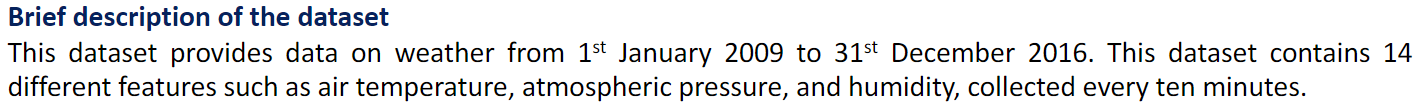

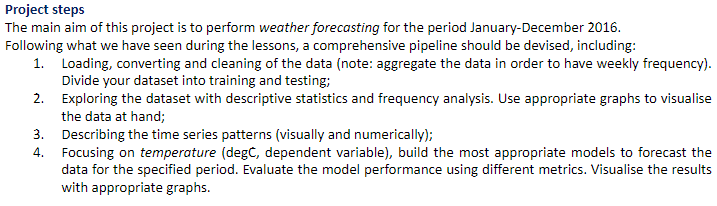

# LOADING CONVERTING AND CLEANING OF THE DATA

## Load

In [3]:
Weather_data = pd.read_csv('Weather_ts.csv', sep=',', parse_dates=['Date Time'], date_format={'Date Time': '%d.%m.%Y %H:%M:%S'}, index_col='Date Time')
#with only the parser the data will not be datatime
#to resolve this problem i use the date_format
display(Weather_data.head(10))

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
Date Time                                                                
2009-01-01 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
2009-01-01 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2009-01-01 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
2009-01-01 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
2009-01-01 00:50:00    996.51     -8.27    265.15        -9.04    94.1   
2009-01-01 01:00:00    996.50     -8.05    265.38        -8.78    94.4   
2009-01-01 01:10:00    996.50     -7.62    265.81        -8.30    94.8   
2009-01-01 01:20:00    996.50     -7.62    265.81        -8.36    94.4   
2009-01-01 01:30:00    996.50     -7.91    265.52        -8.73    93.8   
2009-01-01 01:40:00    996.53     -8.43    264.99        -9.34    93.1   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
2009-01-01 00:10:00          3.33          3.11          0.22       1.94   
2009-01-01 00:20:00          3.23          3.02          0.21       1.89   
2009-01-01 00:30:00          3.21          3.01          0.20       1.88   
2009-01-01 00:40:00          3.26          3.07          0.19       1.92   
2009-01-01 00:50:00          3.27          3.08          0.19       1.92   
2009-01-01 01:00:00          3.33          3.14          0.19       1.96   
2009-01-01 01:10:00          3.44          3.26          0.18       2.04   
2009-01-01 01:20:00          3.44          3.25          0.19       2.03   
2009-01-01 01:30:00          3.36          3.15          0.21       1.97   
2009-01-01 01:40:00          3.23          3.00          0.22       1.88   

                     H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  \
Date Time                                                                     
2009-01-01 00:10:00             3.12       1307.75      1.03           1.75   
2009-01-01 00:20:00             3.03       1309.80      0.72           1.50   
2009-01-01 00:30:00             3.02       1310.24      0.19           0.63   
2009-01-01 00:40:00             3.08       1309.19      0.34           0.50   
2009-01-01 00:50:00             3.09       1309.00      0.32           0.63   
2009-01-01 01:00:00             3.15       1307.86      0.21           0.63   
2009-01-01 01:10:00             3.27       1305.68      0.18           0.63   
2009-01-01 01:20:00             3.26       1305.69      0.19           0.50   
2009-01-01 01:30:00             3.16       1307.17      0.28           0.75   
2009-01-01 01:40:00             3.02       1309.85      0.59           0.88   

                     wd (deg)  
Date Time                      
2009-01-01 00:10:00     152.3  
2009-01-01 00:20:00     136.1  
2009-01-01 00:30:00     171.6  
2009-01-01 00:40:00     198.0  
2009-01-01 00:50:00     214.3  
2009-01-01 01:00:00     192.7  
2009-01-01 01:10:00     166.5  
2009-01-01 01:20:00     118.6  
2009-01-01 01:30:00     188.5  
2009-01-01 01:40:00     185.0

Variables 

-   1	Date Time		Date-time reference (INDEX)
-   2	p (mbar)		Pressure used to quantify internal pressure (in millibars) 
-   3	T (degC)		Temperature in Celsius
-   4	Tpot (K)	             Temperature in Kelvin
-   5	Tdew (degC)		Temperature in Celsius relative to humidity 
-   6	rh (%)		             Relative Humidity 
-   7	VPmax (mbar)	Saturation vapor pressure
-   8	VPact (mbar)		Vapor pressure
-   9	VPdef (mbar)		Vapor pressure deficit
-   10	sh (g/kg)		Specific humidity
-   11	H2OC (mmol/mol)	Water vapor concentration
-   12	rho (g/m**3)	             Airtight 
-   13	wv (m/s)		Wind speed
-   14	max. wv (m/s)	Maximum wind speed
-   15	wd (deg)		Wind direction in degrees


## Clean

In [4]:
#info
Weather_data.info() #no null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420550 entries, 2009-01-01 00:10:00 to 2016-12-31 23:50:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420550 non-null  float64
 1   T (degC)         420550 non-null  float64
 2   Tpot (K)         420550 non-null  float64
 3   Tdew (degC)      420550 non-null  float64
 4   rh (%)           420550 non-null  float64
 5   VPmax (mbar)     420550 non-null  float64
 6   VPact (mbar)     420550 non-null  float64
 7   VPdef (mbar)     420550 non-null  float64
 8   sh (g/kg)        420550 non-null  float64
 9   H2OC (mmol/mol)  420550 non-null  float64
 10  rho (g/m**3)     420550 non-null  float64
 11  wv (m/s)         420550 non-null  float64
 12  max. wv (m/s)    420550 non-null  float64
 13  wd (deg)         420550 non-null  float64
dtypes: float64(14)
memory usage: 48.1 MB


In [5]:
#second test null value
Weather_data.isna().sum() #no null values

p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [6]:
#columns
Weather_data.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [7]:
Weather_data.describe()

p (mbar)       T (degC)       Tpot (K)    Tdew (degC)  \
count  420550.000000  420550.000000  420550.000000  420550.000000   
mean      989.212751       9.450181     283.492779       4.955886   
std         8.358475       8.423346       8.504449       6.730651   
min       913.600000     -23.010000     250.600000     -25.010000   
25%       984.200000       3.360000     277.430000       0.240000   
50%       989.580000       9.420000     283.470000       5.220000   
75%       994.720000      15.470000     289.530000      10.070000   
max      1015.350000      37.280000     311.340000      23.110000   

              rh (%)   VPmax (mbar)   VPact (mbar)   VPdef (mbar)  \
count  420550.000000  420550.000000  420550.000000  420550.000000   
mean       76.008260      13.576273       9.533771       4.042419   
std        16.476195       7.739016       4.184158       4.896855   
min        12.950000       0.950000       0.790000       0.000000   
25%        65.210000       7.780000       6.210000       0.870000   
50%        79.300000      11.820000       8.860000       2.190000   
75%        89.400000      17.600000      12.350000       5.300000   
max       100.000000      63.770000      28.320000      46.010000   

           sh (g/kg)  H2OC (mmol/mol)   rho (g/m**3)       wv (m/s)  \
count  420550.000000    420550.000000  420550.000000  420550.000000   
mean        6.022418         9.640238    1216.062557       1.702225   
std         2.656135         4.235388      39.975064      65.446792   
min         0.500000         0.800000    1059.450000   -9999.000000   
25%         3.920000         6.290000    1187.490000       0.990000   
50%         5.590000         8.960000    1213.790000       1.760000   
75%         7.800000        12.490000    1242.770000       2.860000   
max        18.130000        28.820000    1393.540000      28.490000   

       max. wv (m/s)       wd (deg)  
count  420550.000000  420550.000000  
mean        3.056558     174.743714  
std        69.017014      86.681794  
min     -9999.000000       0.000000  
25%         1.760000     124.900000  
50%         2.960000     198.100000  
75%         4.740000     234.100000  
max        23.500000     360.000000

## Convert

we wnat to have weekly frequency

In [8]:
Weather_data.index

DatetimeIndex(['2009-01-01 00:10:00', '2009-01-01 00:20:00',
               '2009-01-01 00:30:00', '2009-01-01 00:40:00',
               '2009-01-01 00:50:00', '2009-01-01 01:00:00',
               '2009-01-01 01:10:00', '2009-01-01 01:20:00',
               '2009-01-01 01:30:00', '2009-01-01 01:40:00',
               ...
               '2016-12-31 22:20:00', '2016-12-31 22:30:00',
               '2016-12-31 22:40:00', '2016-12-31 22:50:00',
               '2016-12-31 23:00:00', '2016-12-31 23:10:00',
               '2016-12-31 23:20:00', '2016-12-31 23:30:00',
               '2016-12-31 23:40:00', '2016-12-31 23:50:00'],
              dtype='datetime64[ns]', name='Date Time', length=420550, freq=None)

In [9]:
Weather_data.index.year.unique()

Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int32', name='Date Time')

In [10]:
Weather_data.index.month.unique()

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='Date Time')

In [11]:
Weather_data.index.day.unique()

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int32', name='Date Time')

In [12]:
Weather_data.index.minute.unique()

Index([10, 20, 30, 40, 50, 0], dtype='int32', name='Date Time')

In [13]:
Weather_data.index.second.unique()

Index([0], dtype='int32', name='Date Time')

In [14]:
#convert the data time in weekly frequency
Weather_data_wk = Weather_data.resample('W').mean()
display(Weather_data_wk)

p (mbar)   T (degC)    Tpot (K)  Tdew (degC)     rh (%)  \
Date Time                                                                
2009-01-04   996.446696  -4.292070  269.146087    -6.185148  87.255409   
2009-01-11   999.146161 -11.057847  262.168393   -13.171438  84.714841   
2009-01-18   991.308760  -1.717867  272.126657    -4.664692  81.310595   
2009-01-25   970.486319   1.151438  276.681220    -1.678264  82.035218   
2009-02-01   990.295337  -2.464573  271.454127    -3.848323  90.406944   
...                 ...        ...         ...          ...        ...   
2016-12-04   999.956121  -0.467679  272.701944    -3.387222  81.552579   
2016-12-11  1000.134891   1.667212  274.823413    -1.334246  81.225665   
2016-12-18  1002.300288   2.645923  275.628373     1.012192  89.163800   
2016-12-25  1000.907817   1.969593  275.060228    -0.343909  85.042927   
2017-01-01  1007.889549   2.689560  275.233866    -0.238472  81.632986   

            VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                         
2009-01-04      4.511496      3.918348      0.593009   2.451287   
2009-01-11      2.831081      2.369058      0.462044   1.477421   
2009-01-18      5.561796      4.483313      1.078720   2.820536   
2009-01-25      6.752004      5.444335      1.307619   3.499306   
2009-02-01      5.104276      4.617619      0.486429   2.905952   
...                  ...           ...           ...        ...   
2016-12-04      6.156409      4.900109      1.256071   3.058046   
2016-12-11      7.381587      5.828373      1.553492   3.637927   
2016-12-18      7.507450      6.704841      0.802490   4.174643   
2016-12-25      7.248353      6.080327      1.168135   3.788710   
2017-01-01      7.702361      6.203750      1.498484   3.838715   

            H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)    wd (deg)  
Date Time                                                                       
2009-01-04         3.934887   1289.293165  1.293252       2.310504  177.589652  
2009-01-11         2.372718   1327.335734  1.312153       2.256984  158.967391  
2009-01-18         4.526012   1270.352133  1.879524       2.970417  178.882599  
2009-01-25         5.613720   1230.040417  2.553998       3.973105  188.601022  
2009-02-01         4.663750   1272.179296  1.981885       3.170645   46.615129  
...                     ...           ...       ...            ...         ...  
2016-12-04         4.906677   1275.453720  1.437123       2.741706  190.730853  
2016-12-11         5.834554   1265.589107  1.437609       2.601359  182.925089  
2016-12-18         6.694365   1262.940823  1.418085       2.399752  185.361032  
2016-12-25         6.076379   1264.651042  1.912788       3.262143  184.388889  
2017-01-01         6.156250   1270.206458  1.972280       3.632130  222.820949  

[418 rows x 14 columns]

## Divide dataset into training and testing

The main aim of this project is to perform weather forecasting for the period January-December 2016.

In [15]:
#train everything before january 2016
Weather_data_wk_train = Weather_data_wk[Weather_data_wk.index < '2016-01-01']
Weather_data_wk_test = Weather_data_wk[Weather_data_wk.index >= '2016-01-01']

display(Weather_data_wk_train.index.year.unique())
display(Weather_data_wk_test.index.year.unique())

Index([2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype='int32', name='Date Time')

Index([2016, 2017], dtype='int32', name='Date Time')

# EXPLORING THE DATASET

## Descriptive Statistic

fare .describe e fare gli histogrammi

In [16]:
display(Weather_data_wk)

p (mbar)   T (degC)    Tpot (K)  Tdew (degC)     rh (%)  \
Date Time                                                                
2009-01-04   996.446696  -4.292070  269.146087    -6.185148  87.255409   
2009-01-11   999.146161 -11.057847  262.168393   -13.171438  84.714841   
2009-01-18   991.308760  -1.717867  272.126657    -4.664692  81.310595   
2009-01-25   970.486319   1.151438  276.681220    -1.678264  82.035218   
2009-02-01   990.295337  -2.464573  271.454127    -3.848323  90.406944   
...                 ...        ...         ...          ...        ...   
2016-12-04   999.956121  -0.467679  272.701944    -3.387222  81.552579   
2016-12-11  1000.134891   1.667212  274.823413    -1.334246  81.225665   
2016-12-18  1002.300288   2.645923  275.628373     1.012192  89.163800   
2016-12-25  1000.907817   1.969593  275.060228    -0.343909  85.042927   
2017-01-01  1007.889549   2.689560  275.233866    -0.238472  81.632986   

            VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                         
2009-01-04      4.511496      3.918348      0.593009   2.451287   
2009-01-11      2.831081      2.369058      0.462044   1.477421   
2009-01-18      5.561796      4.483313      1.078720   2.820536   
2009-01-25      6.752004      5.444335      1.307619   3.499306   
2009-02-01      5.104276      4.617619      0.486429   2.905952   
...                  ...           ...           ...        ...   
2016-12-04      6.156409      4.900109      1.256071   3.058046   
2016-12-11      7.381587      5.828373      1.553492   3.637927   
2016-12-18      7.507450      6.704841      0.802490   4.174643   
2016-12-25      7.248353      6.080327      1.168135   3.788710   
2017-01-01      7.702361      6.203750      1.498484   3.838715   

            H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)    wd (deg)  
Date Time                                                                       
2009-01-04         3.934887   1289.293165  1.293252       2.310504  177.589652  
2009-01-11         2.372718   1327.335734  1.312153       2.256984  158.967391  
2009-01-18         4.526012   1270.352133  1.879524       2.970417  178.882599  
2009-01-25         5.613720   1230.040417  2.553998       3.973105  188.601022  
2009-02-01         4.663750   1272.179296  1.981885       3.170645   46.615129  
...                     ...           ...       ...            ...         ...  
2016-12-04         4.906677   1275.453720  1.437123       2.741706  190.730853  
2016-12-11         5.834554   1265.589107  1.437609       2.601359  182.925089  
2016-12-18         6.694365   1262.940823  1.418085       2.399752  185.361032  
2016-12-25         6.076379   1264.651042  1.912788       3.262143  184.388889  
2017-01-01         6.156250   1270.206458  1.972280       3.632130  222.820949  

[418 rows x 14 columns]

### Plot

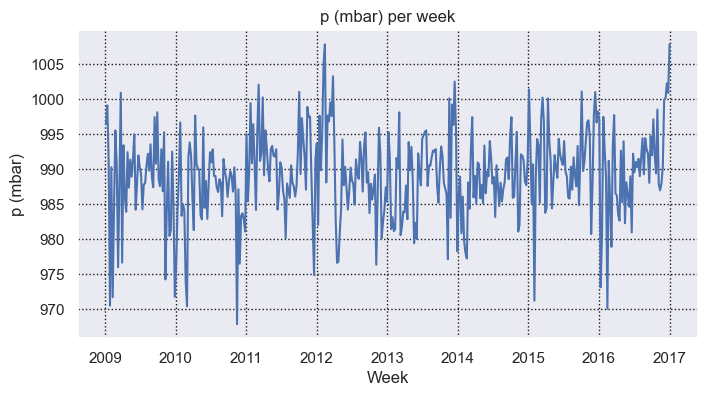

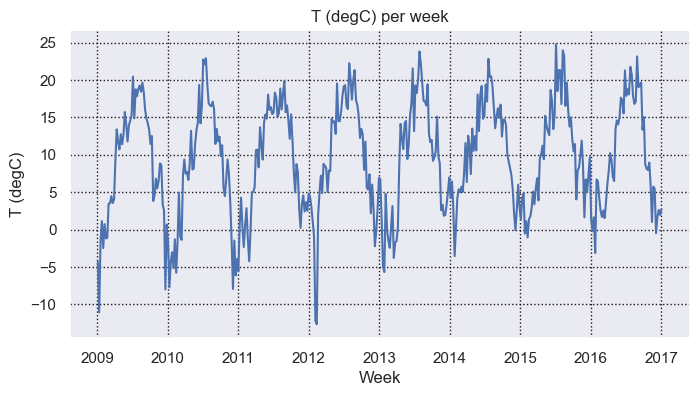

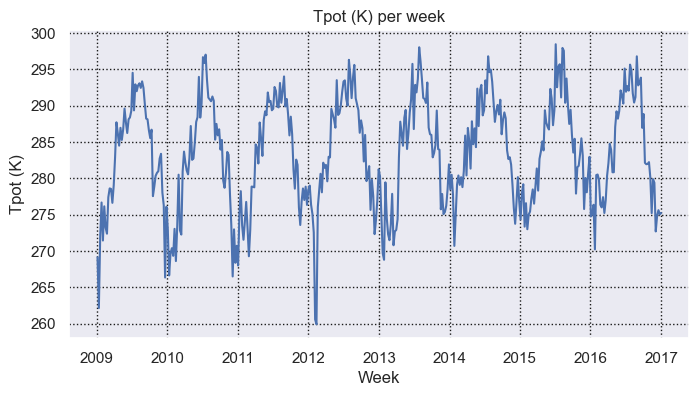

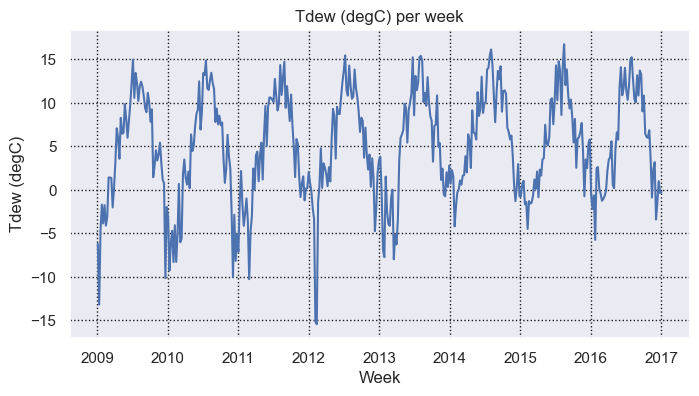

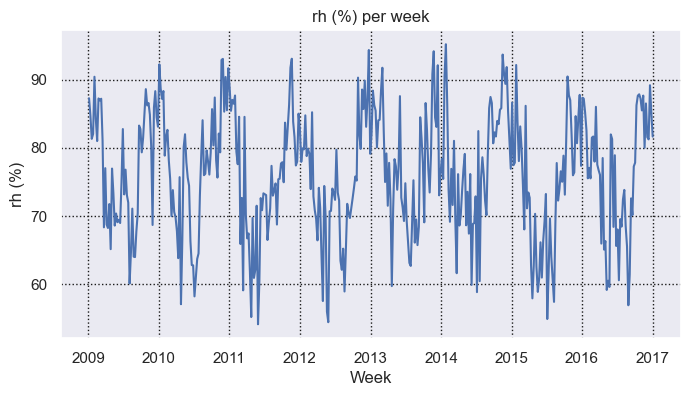

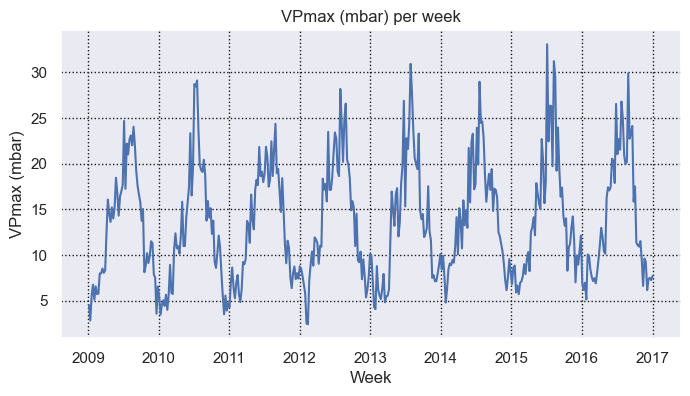

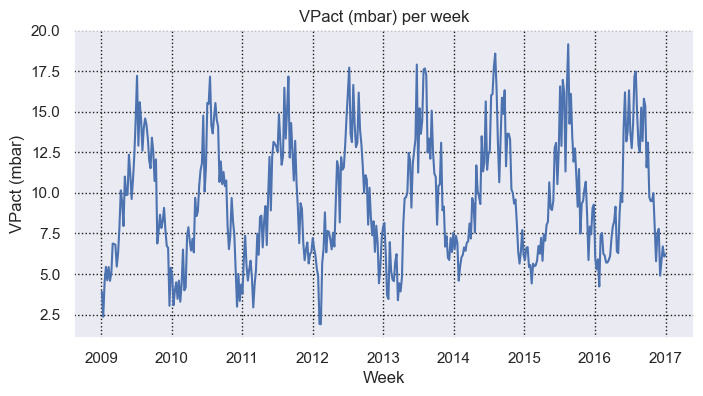

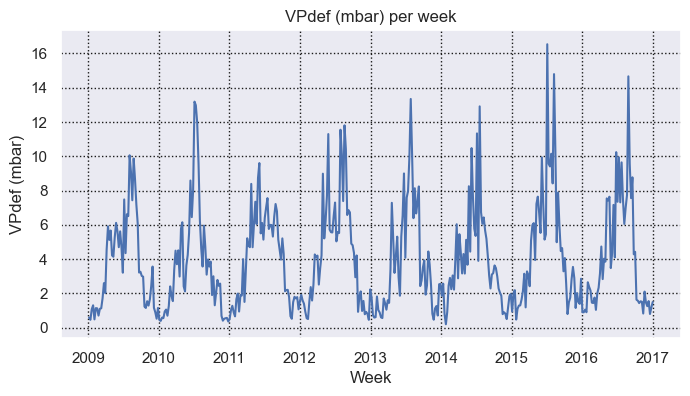

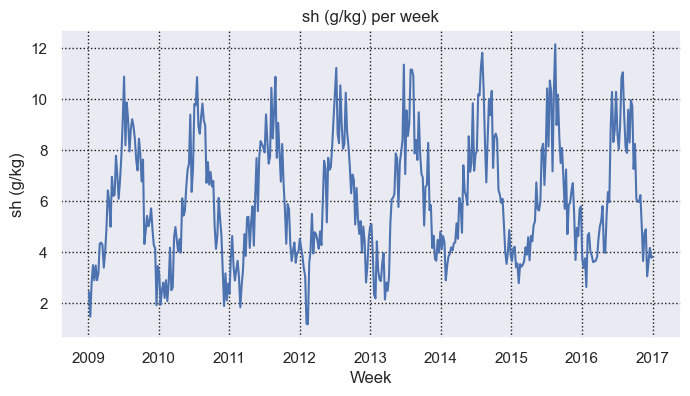

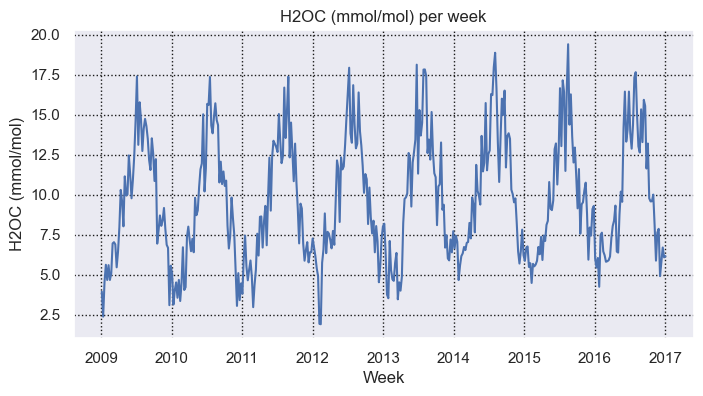

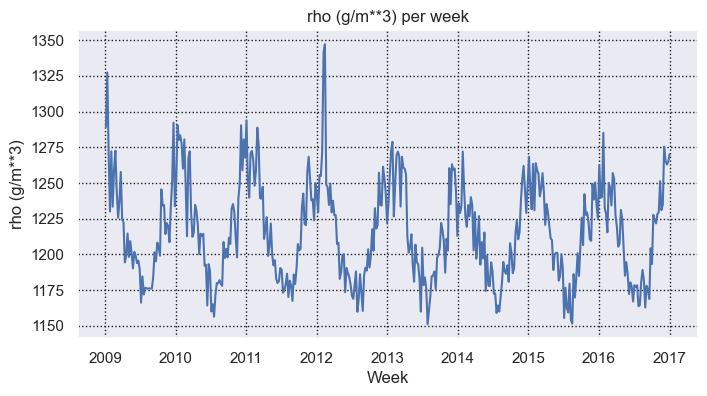

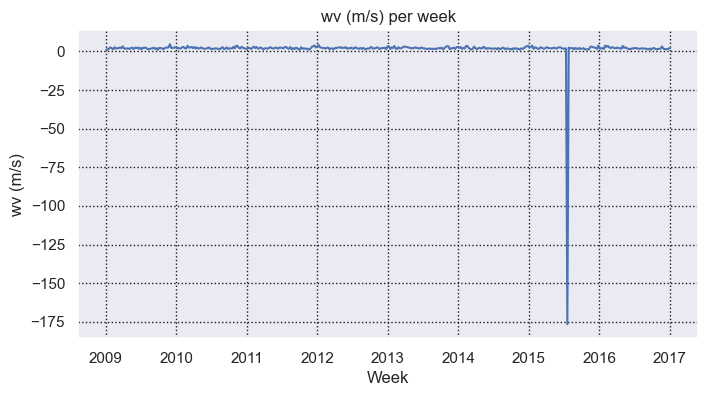

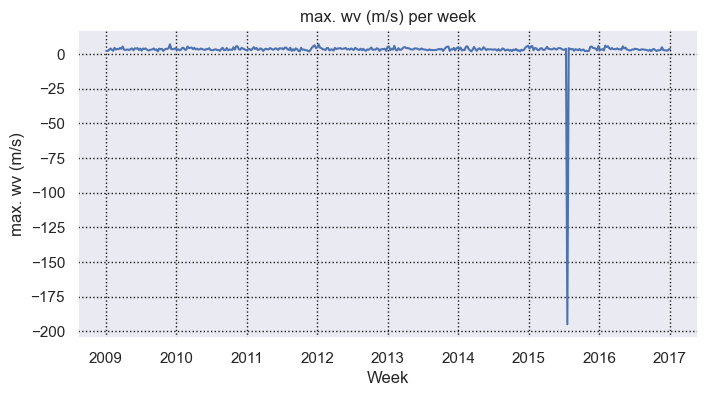

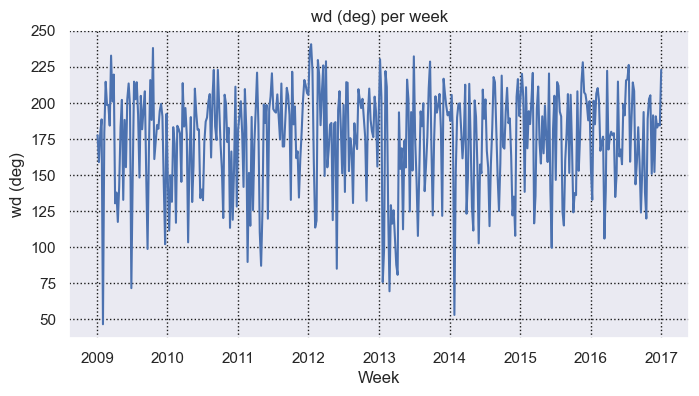

In [17]:
# plot all the data
for column in Weather_data_wk.columns:
    plt.figure(figsize=(8,4))
    plt.plot(Weather_data_wk[column])
    plt.grid(True, color = 'k', linestyle = ':')
    plt.title(column + ' per week')
    plt.xlabel('Week')
    plt.ylabel(column)

probabile outliers in max????? controllare

### Heatmap

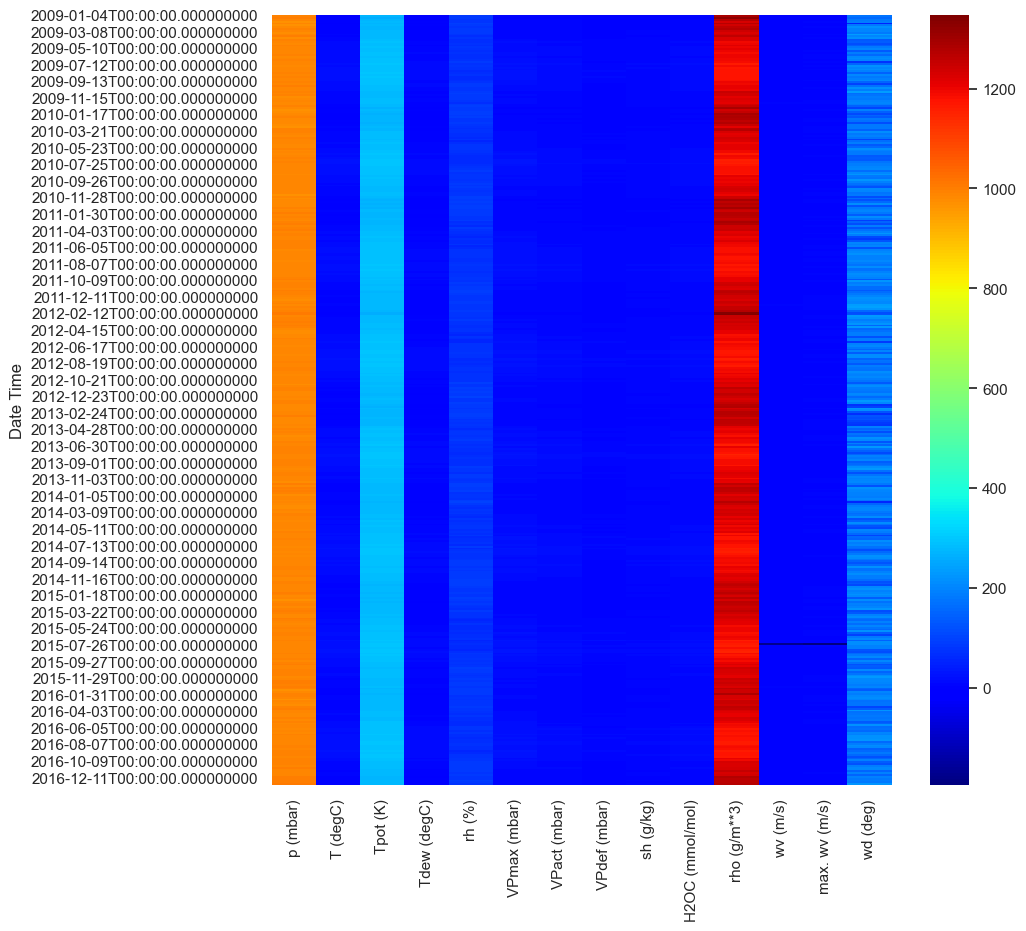

In [18]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(Weather_data_wk, cmap='jet')
plt.show()

### Boxplot

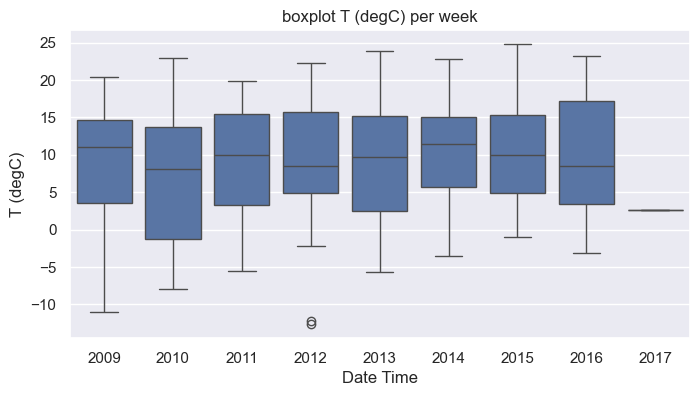

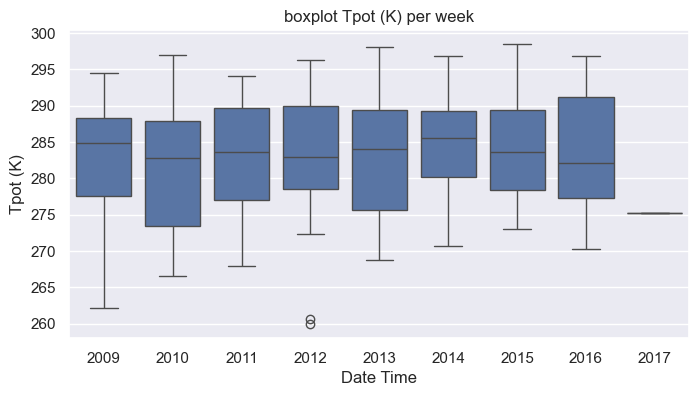

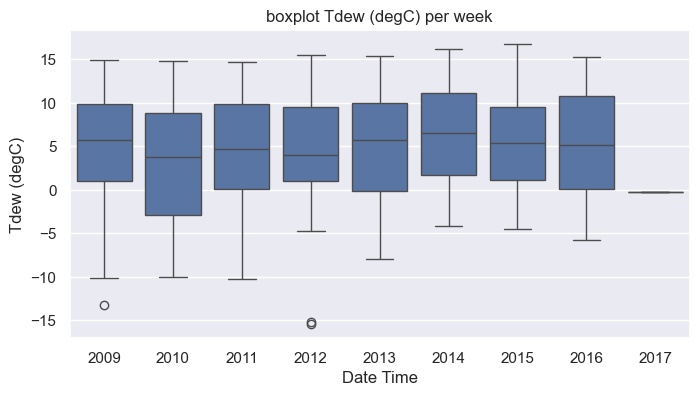

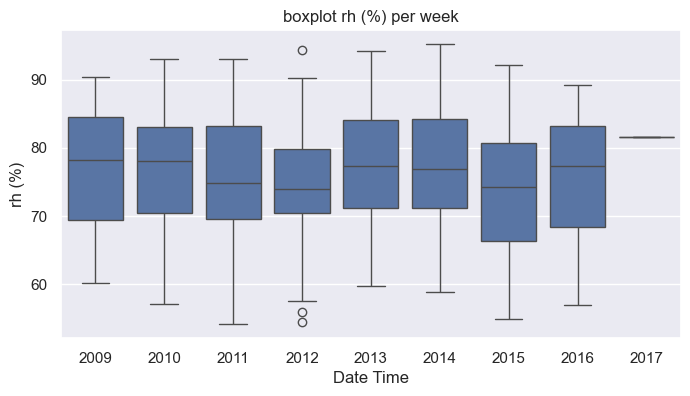

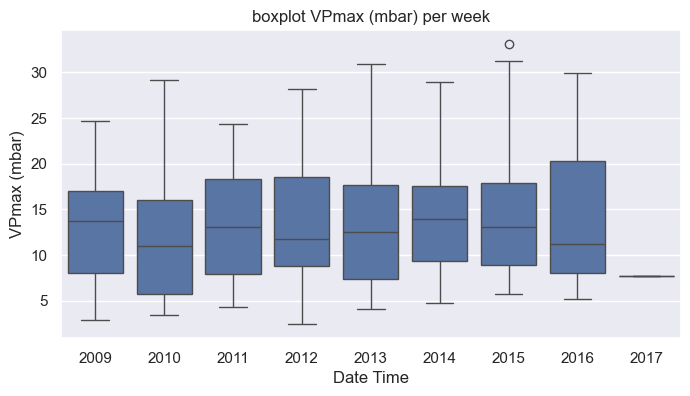

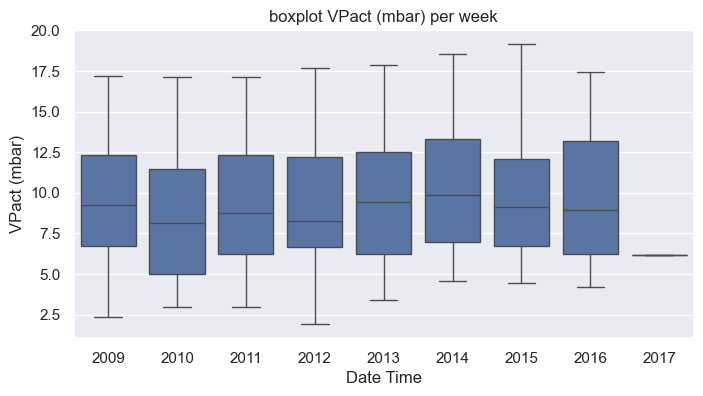

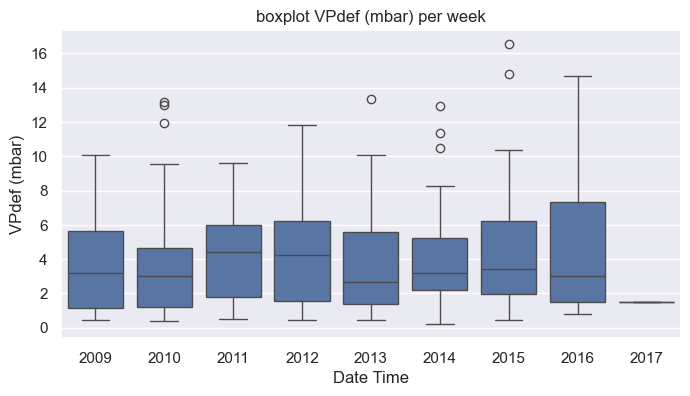

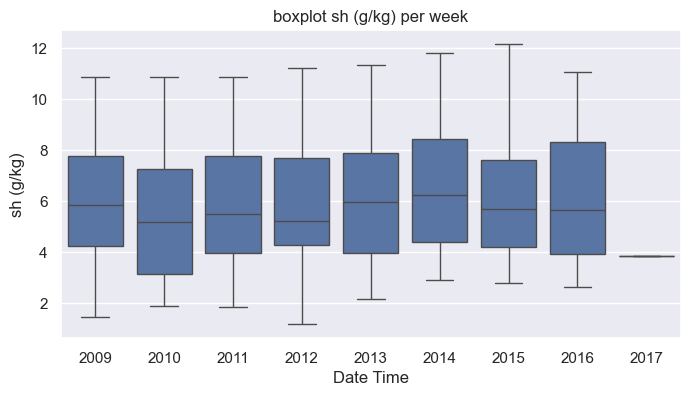

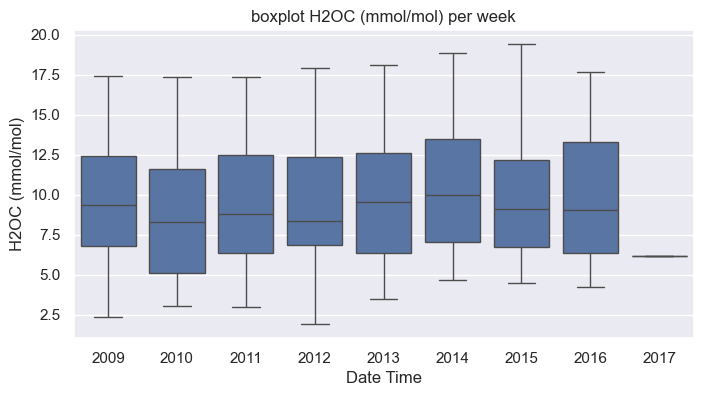

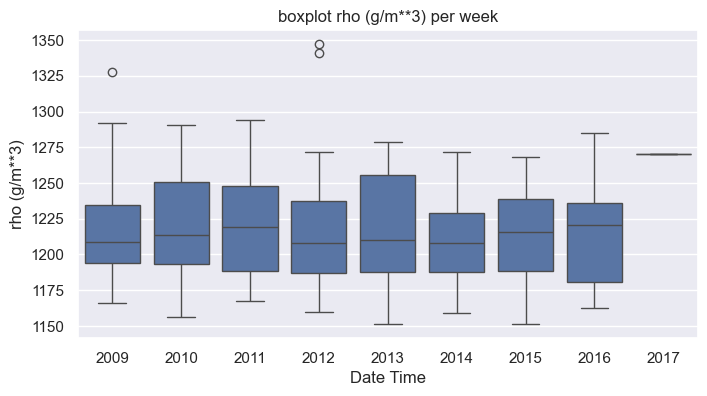

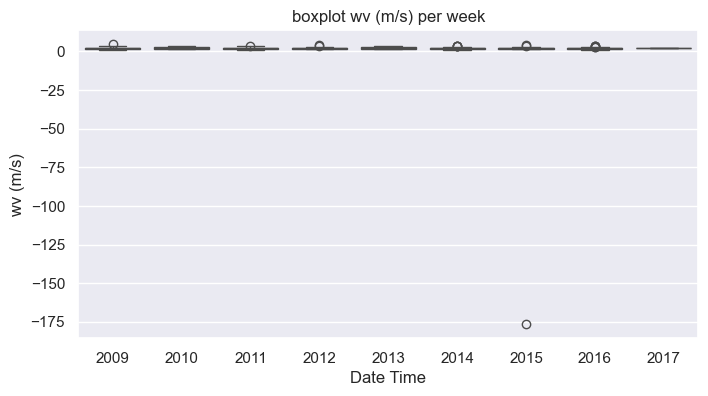

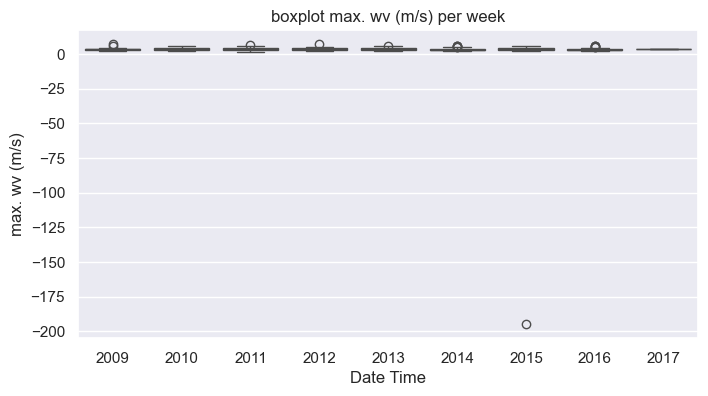

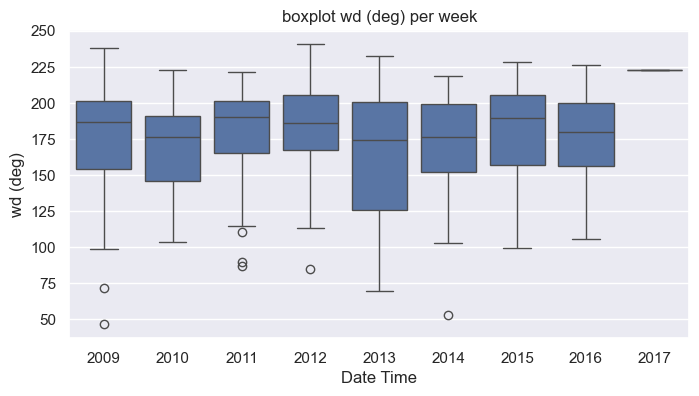

In [19]:
#Boxplot
# plot all the data
for column in Weather_data_wk.columns:
    plt.figure(figsize=(8,4))
    #plt.plot(Weather_data_wk[column])
    #plt.grid(True, color = 'k', linestyle = ':')
    plt.title('boxplot ' + column + ' per week')
    #plt.xlabel('Week')
    #plt.ylabel(column)
    sns.boxplot(x = Weather_data_wk.index.year, y = Weather_data_wk[column])
    plt.show()

outliers in wv

### Outliers

i decide to use the standard deviation method

In [20]:
for column in Weather_data_wk.columns:
    print('---------------------------')
    print(f'Outlier with standard deviation method for {column}')
    mean_value = np.mean(Weather_data_wk[column]) #calcolo la media
    sd_value = np.std(Weather_data_wk[column]) #calcolo lo sd
    thr = 3*sd_value 
    Lower = mean_value - thr
    Upper = mean_value + thr

    outliers = [i for i in Weather_data_wk[column] if i < Lower or i > Upper] #prendo tutti i valori fuori dal limite -> outlier
    print('Number of outliers:', len(outliers))
    print('Outliers:', outliers)

    P_no_outliers = [i for i in Weather_data_wk[column] if i > Lower and i < Upper]
    print('Number of non-outliers:', len(P_no_outliers))

---------------------------
Outlier with standard deviation method for p (mbar)
Number of outliers: 5
Outliers: [970.4863194444445, 970.3948611111111, 967.8167956349206, 970.0243253968254, 1007.8895486111111]
Number of non-outliers: 413
---------------------------
Outlier with standard deviation method for T (degC)
Number of outliers: 0
Outliers: []
Number of non-outliers: 418
---------------------------
Outlier with standard deviation method for Tpot (K)
Number of outliers: 2
Outliers: [260.60050595238096, 259.93815476190474]
Number of non-outliers: 416
---------------------------
Outlier with standard deviation method for Tdew (degC)
Number of outliers: 2
Outliers: [-15.153799603174603, -15.437232142857143]
Number of non-outliers: 416
---------------------------
Outlier with standard deviation method for rh (%)
Number of outliers: 0
Outliers: []
Number of non-outliers: 418
---------------------------
Outlier with standard deviation method for VPmax (mbar)
Number of outliers: 1
Outlie

come possiamo vedere in wm e max wm abbiamo trovato gli outlier maggiori 

Per quanto rigurda la temperatura in C non abbiamo trovato outliers

### Correlation

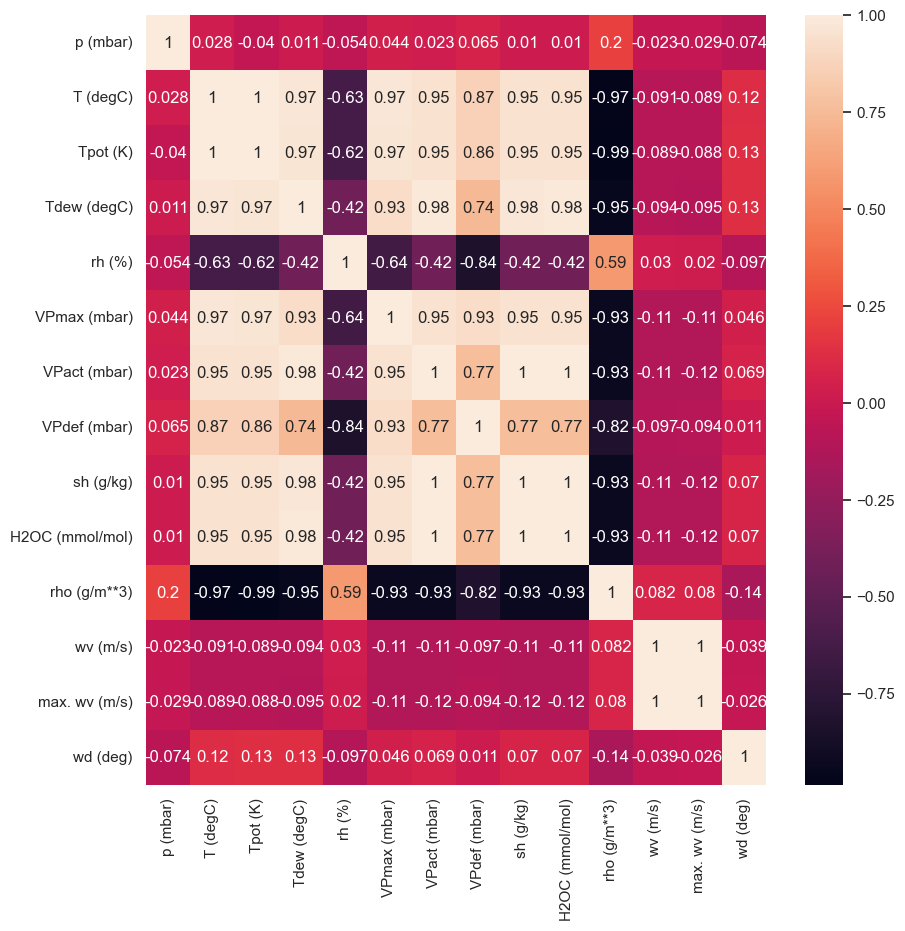

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(Weather_data_wk.corr(), annot=True)
plt.show()

METTERE EFFETIVAMNETE UNA DESCRIZIONE

### Autocorrelation

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

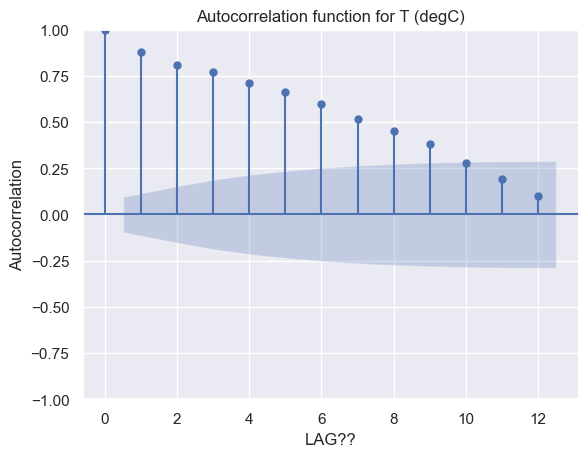

<Figure size 800x400 with 0 Axes>

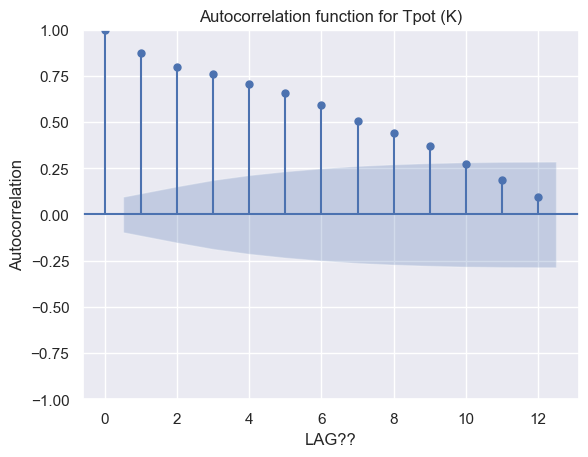

<Figure size 800x400 with 0 Axes>

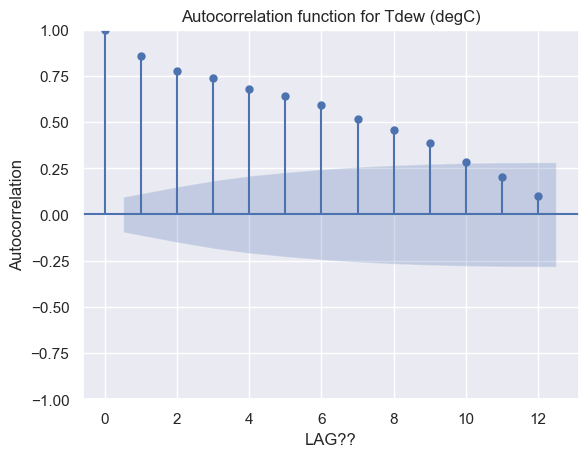

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

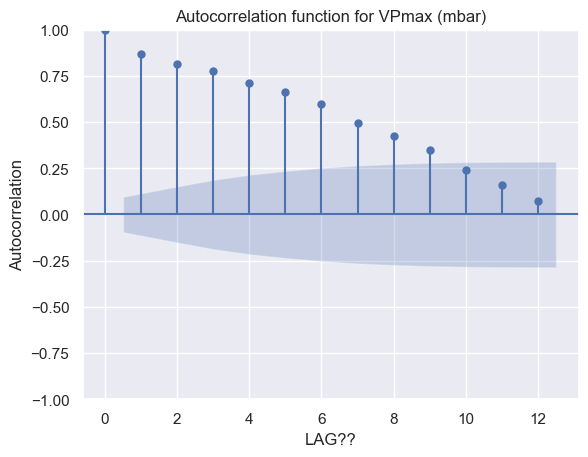

<Figure size 800x400 with 0 Axes>

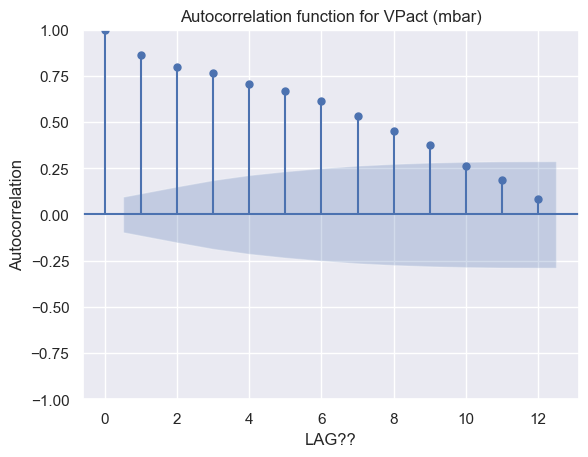

<Figure size 800x400 with 0 Axes>

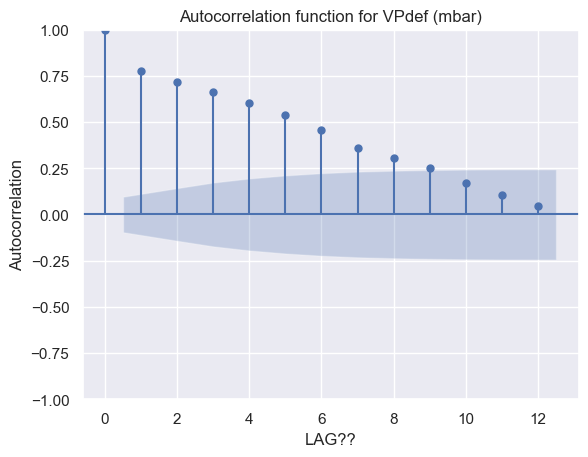

<Figure size 800x400 with 0 Axes>

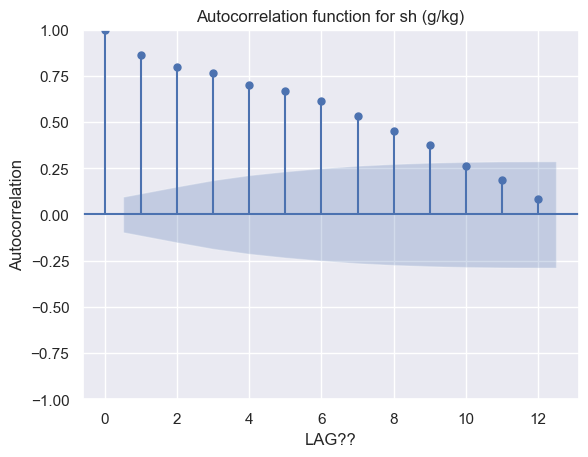

<Figure size 800x400 with 0 Axes>

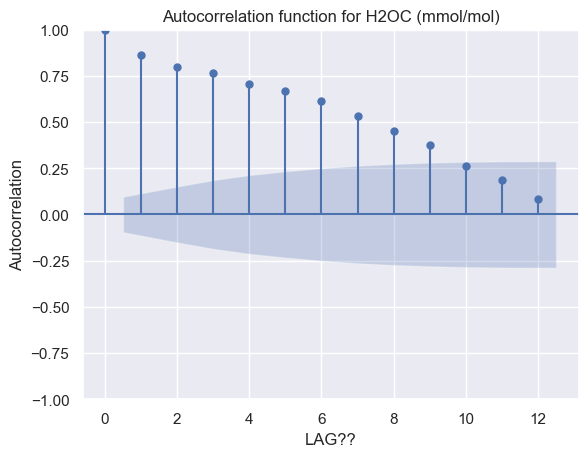

<Figure size 800x400 with 0 Axes>

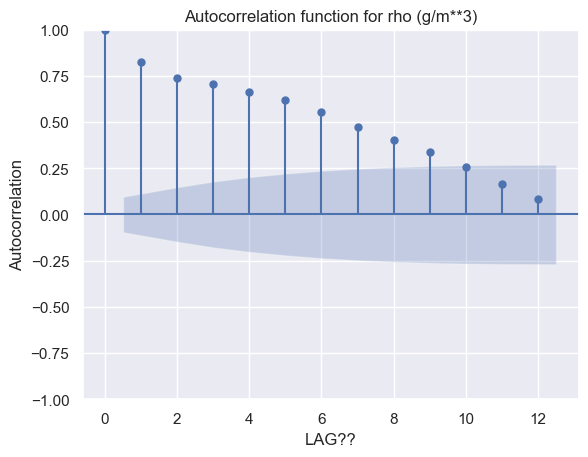

<Figure size 800x400 with 0 Axes>

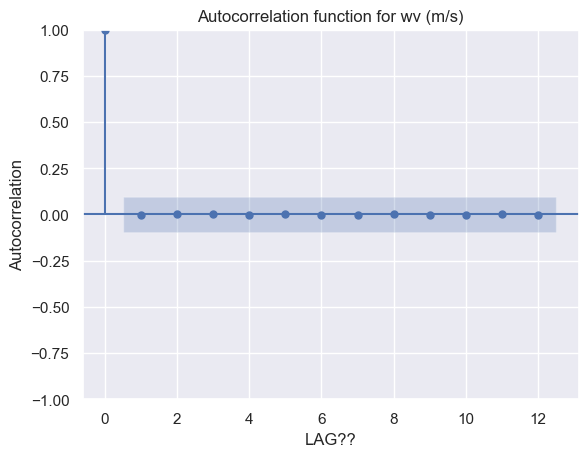

<Figure size 800x400 with 0 Axes>

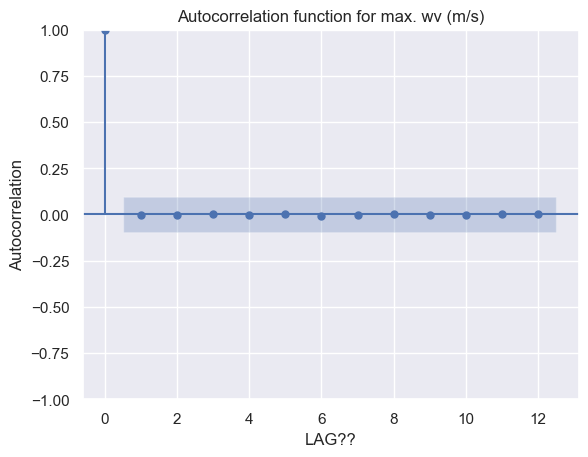

<Figure size 800x400 with 0 Axes>

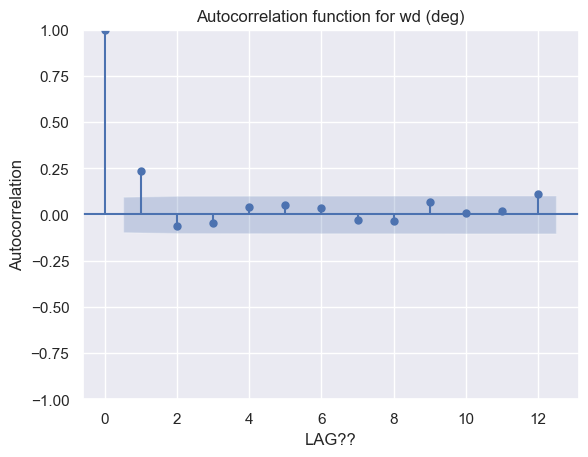

In [22]:
# plot all the data
for column in Weather_data_wk.columns:
    plt.figure(figsize=(8,4))
    plot_acf(Weather_data_wk[column], lags=12)
    plt.title('Autocorrelation function for ' + column)
    plt.xlabel('LAG??')
    plt.ylabel('Autocorrelation')
    plt.show()
    
#matplotlib.pyplot.close()

per la maggior parte abbiamo un seasonality che si ripete ogni 1 mese/ 1 lag, in più la autocorrelazione è sempre positiva (RIVEDER)

## Frequency Analysis


vedere la lezione 6 fatta dalla prof

solo sulla temperatura

### FFT and Amplitude Spectrum

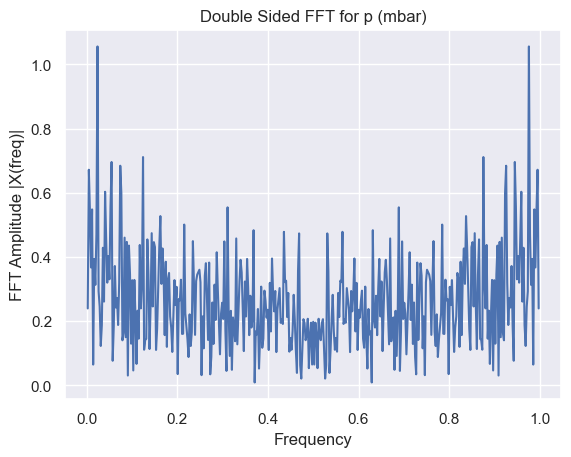

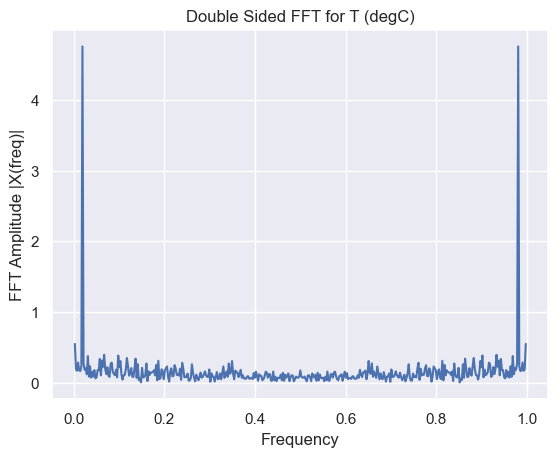

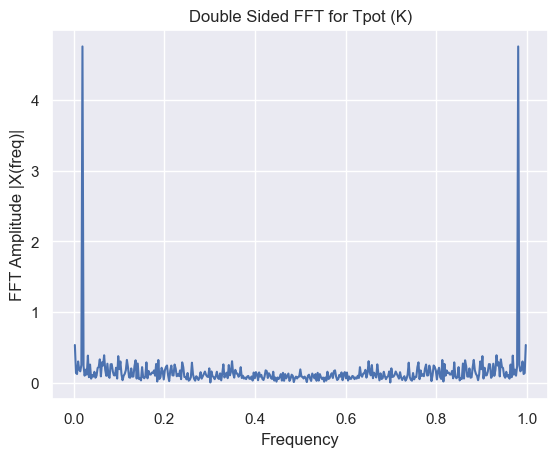

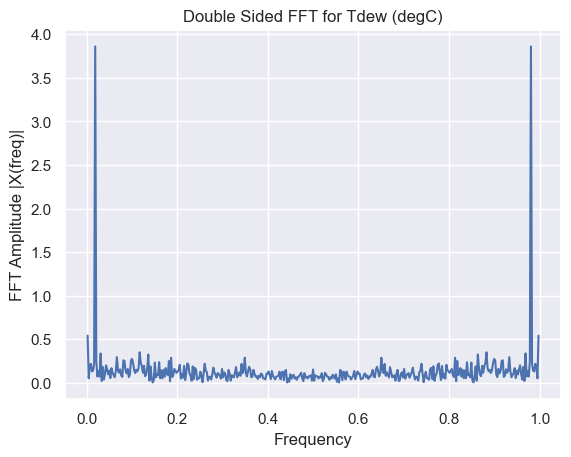

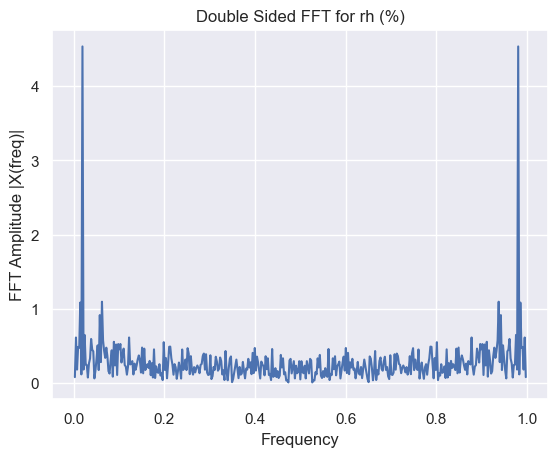

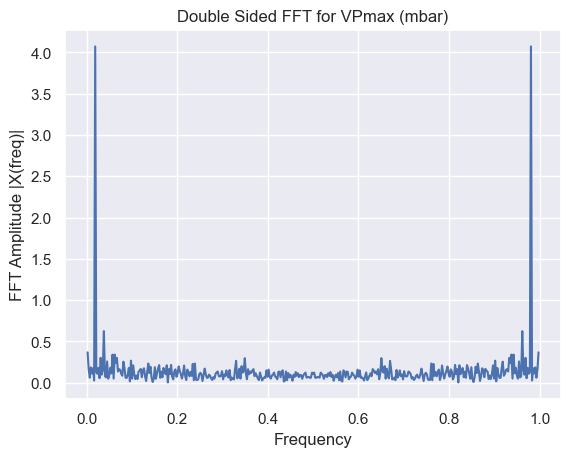

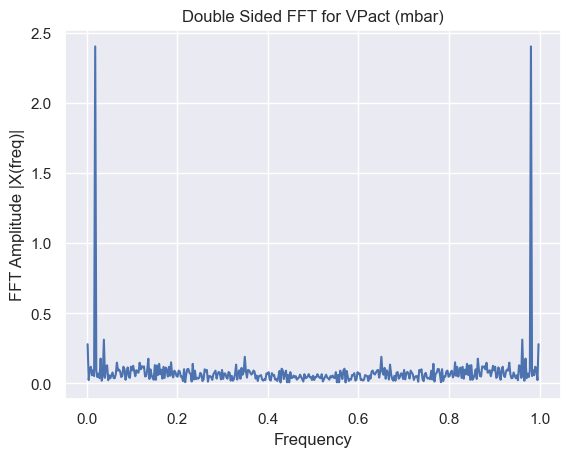

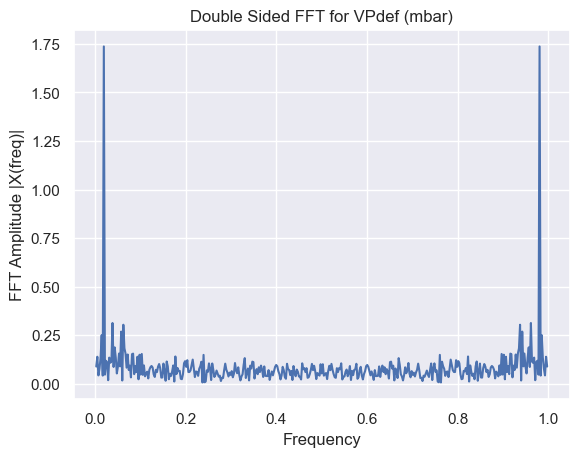

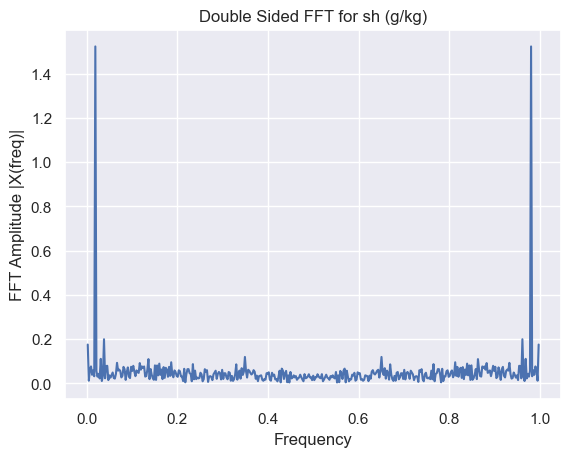

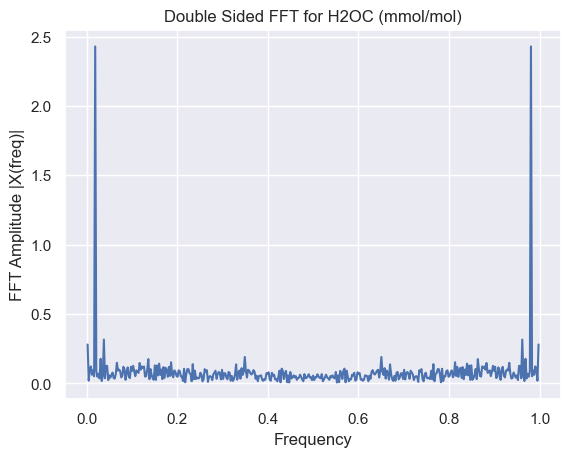

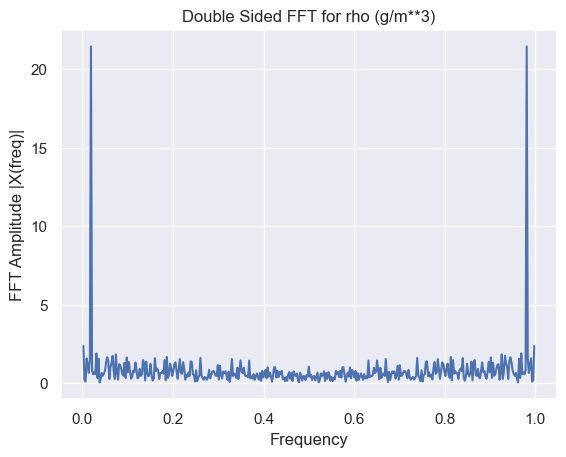

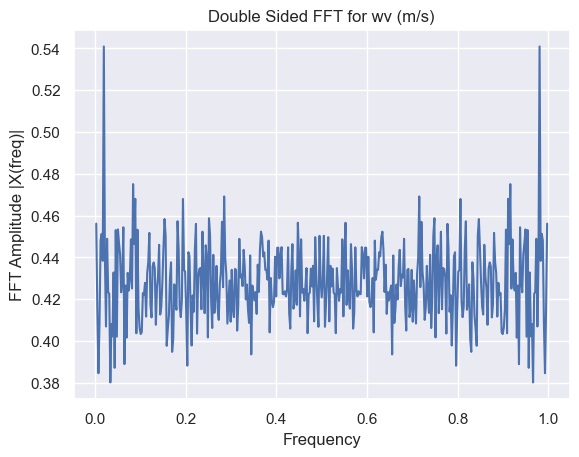

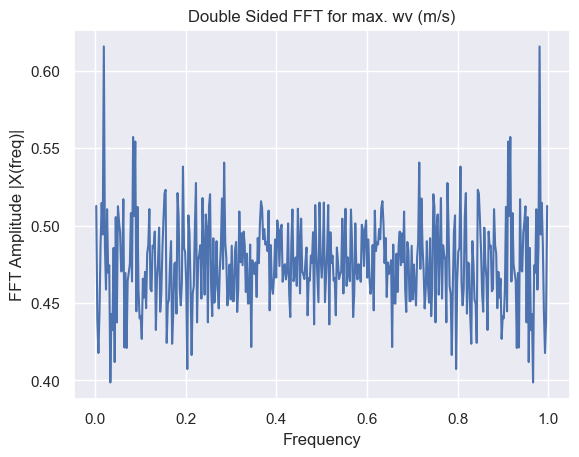

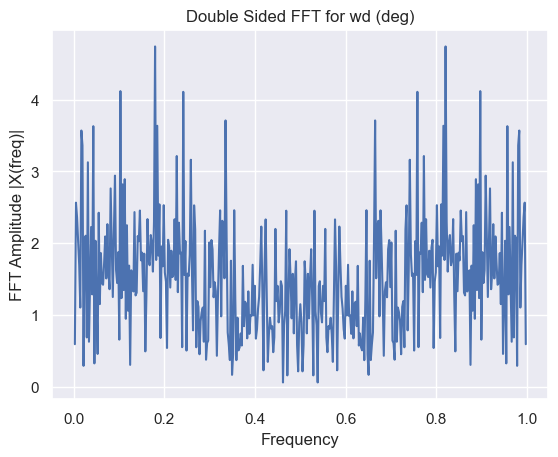

In [23]:
# FFT and Amplitude Spectrum
for column in Weather_data_wk.columns:
    Fs = 1 # sampling rate, our unit of measure is "months" (Important!) --> the data are sampled monthly, thus the sampling rate is 1 sample per month
    X = fft(Weather_data_wk[column].values)
    N = len(X)
    freq_step = Fs/N
    freq_vec = np.arange(0,Fs,freq_step)

    ampl = np.abs(X[1:])/N # Start from 1 to remove the zero frequency component, called DC
    freq_vec = freq_vec[1:]
    plt.plot(freq_vec,ampl)
    plt.title(f'Double Sided FFT for {column}')
    plt.xlabel('Frequency')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.show()

### Power Spectral Density (PSD)

### Power Spectral Density (PSD) based on Periodgram

#### test 1

Frequency     Density     Period
0   0.023923  488.187013  41.800000
1   0.124402  397.882017   8.038462
2   0.052632  366.198607  19.000000
3   0.043062  365.740729  23.222222
4   0.074163  296.012373  13.483871

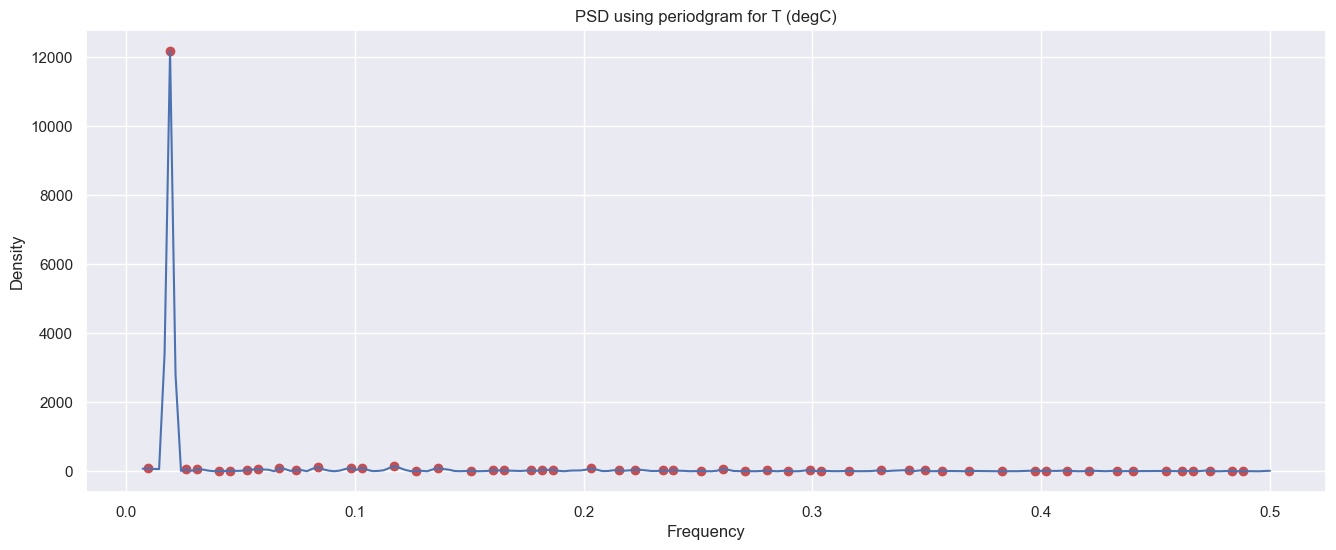

Frequency       Density     Period
0   0.019139  12174.587377  52.250000
1   0.117225    143.653699   8.530612
2   0.083732    115.405743  11.942857
3   0.102871     99.891752   9.720930
4   0.136364     94.769889   7.333333

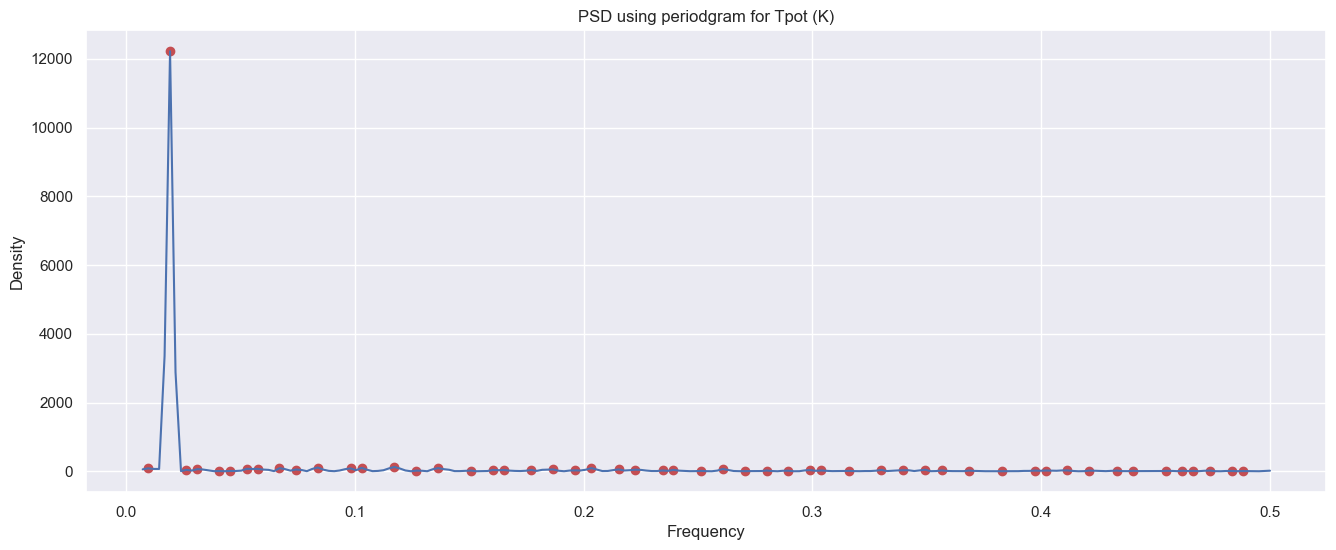

Frequency       Density     Period
0   0.019139  12220.697671  52.250000
1   0.117225    124.072864   8.530612
2   0.083732    108.368940  11.942857
3   0.102871     97.029628   9.720930
4   0.203349     91.591812   4.917647

Frequency      Density     Period
0   0.019139  8094.778894  52.250000
1   0.117225   126.348581   8.530612
2   0.083732    91.054477  11.942857
3   0.136364    88.822473   7.333333
4   0.066986    73.774595  14.928571

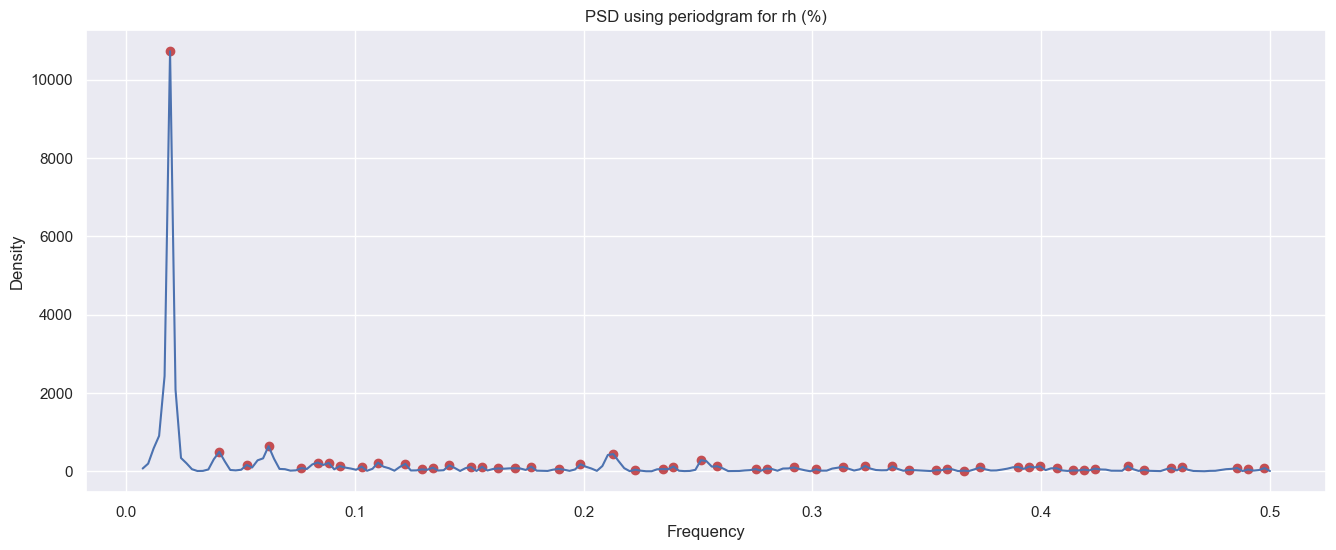

Frequency       Density     Period
0   0.019139  10724.997129  52.250000
1   0.062201    640.552765  16.076923
2   0.040670    496.491458  24.588235
3   0.212919    439.006802   4.696629
4   0.251196    282.437072   3.980952

Frequency      Density     Period
0   0.019139  9018.265704  52.250000
1   0.038278   207.591073  26.125000
2   0.062201    72.258105  16.076923
3   0.081340    70.948904  12.294118
4   0.349282    53.743340   2.863014

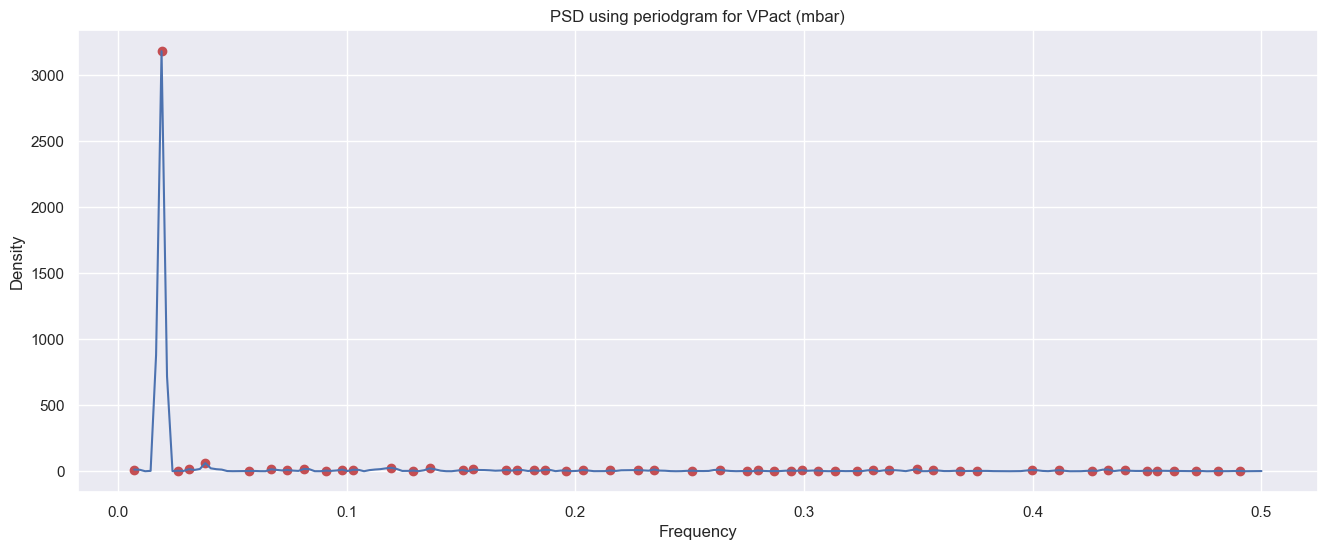

Frequency      Density     Period
0   0.019139  3179.071184  52.250000
1   0.038278    61.681571  26.125000
2   0.119617    25.912767   8.360000
3   0.136364    21.977453   7.333333
4   0.081340    17.028194  12.294118

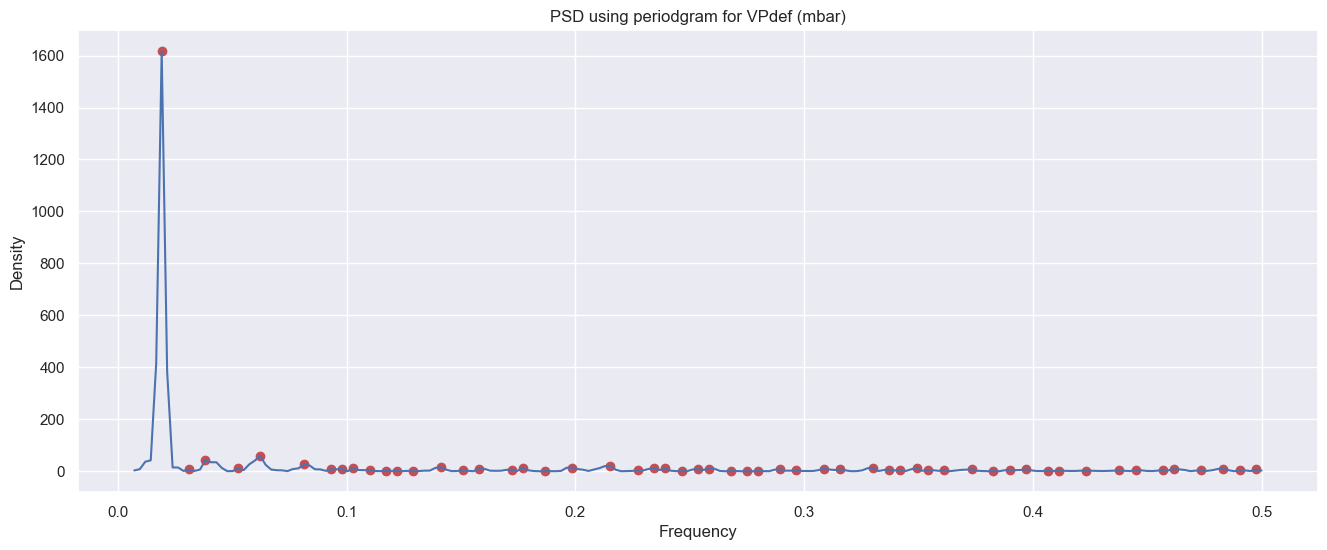

Frequency      Density     Period
0   0.019139  1616.528878  52.250000
1   0.062201    59.215714  16.076923
2   0.038278    43.139248  26.125000
3   0.081340    26.032114  12.294118
4   0.215311    20.907381   4.644444

Frequency      Density     Period
0   0.019139  1276.546272  52.250000
1   0.038278    25.091996  26.125000
2   0.119617    10.108171   8.360000
3   0.136364     8.661551   7.333333
4   0.081340     6.770074  12.294118

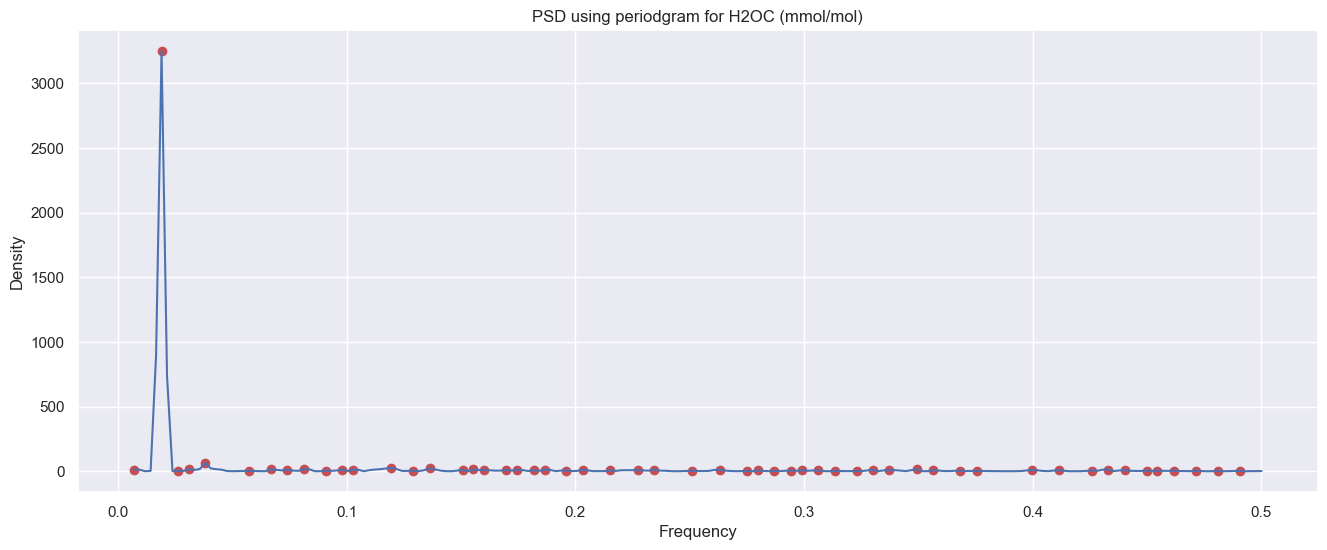

Frequency      Density     Period
0   0.019139  3248.070654  52.250000
1   0.038278    63.018367  26.125000
2   0.119617    25.732121   8.360000
3   0.136364    22.046513   7.333333
4   0.081340    17.255386  12.294118

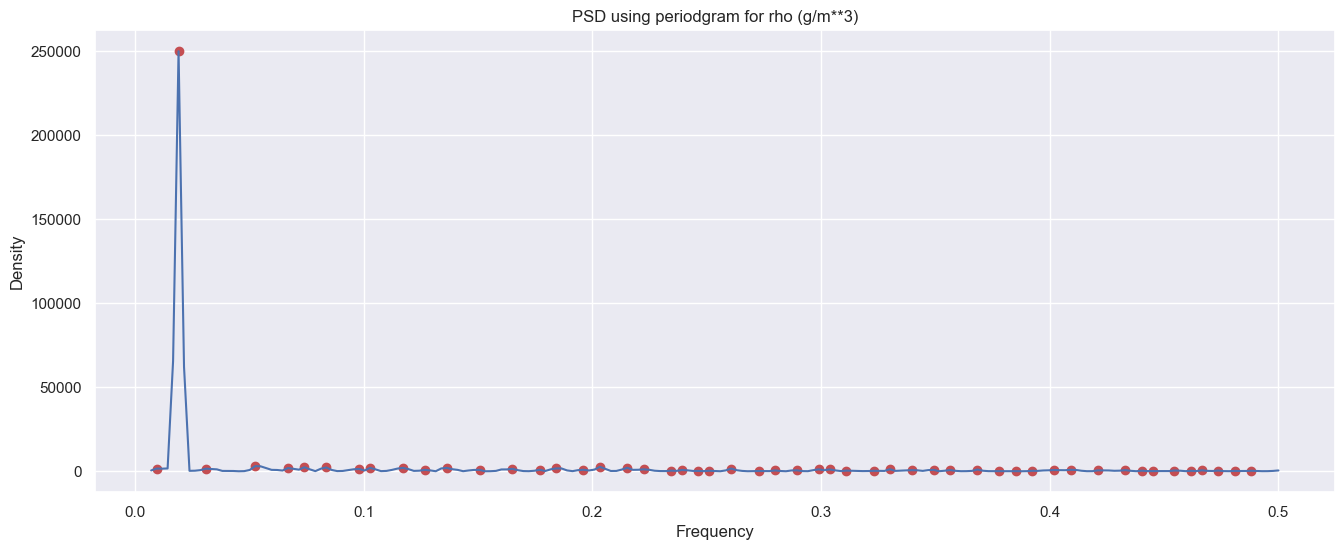

Frequency        Density     Period
0   0.019139  249978.526403  52.250000
1   0.052632    3027.546872  19.000000
2   0.203349    2634.786440   4.917647
3   0.074163    2372.142653  13.483871
4   0.083732    2247.921492  11.942857

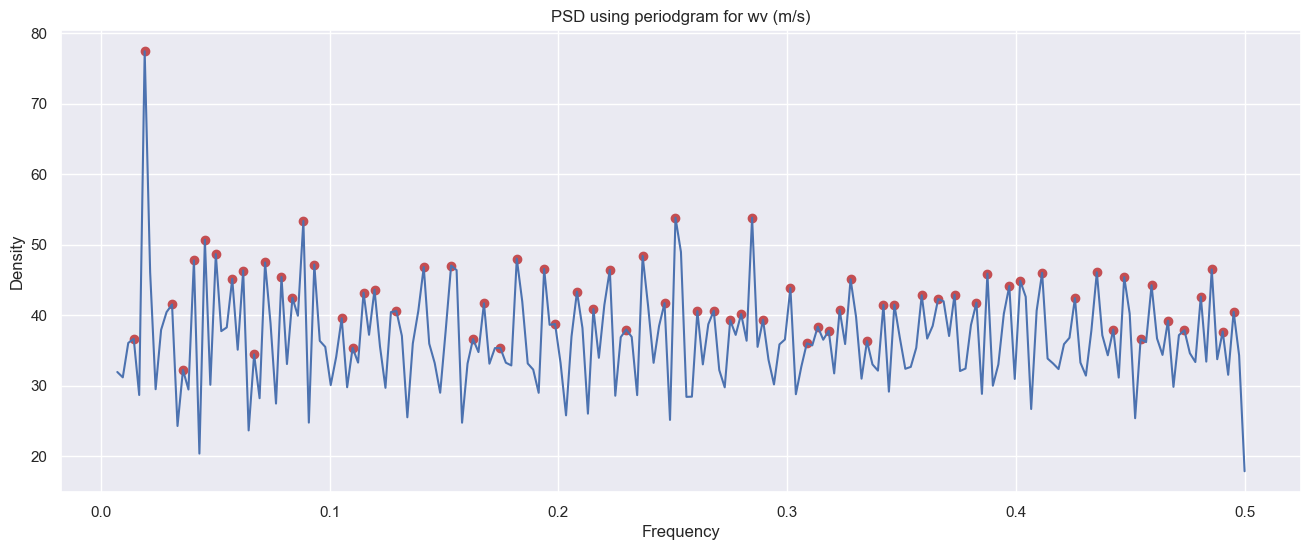

Frequency    Density     Period
0   0.019139  77.413800  52.250000
1   0.284689  53.826664   3.512605
2   0.251196  53.815005   3.980952
3   0.088517  53.350201  11.297297
4   0.045455  50.679557  22.000000

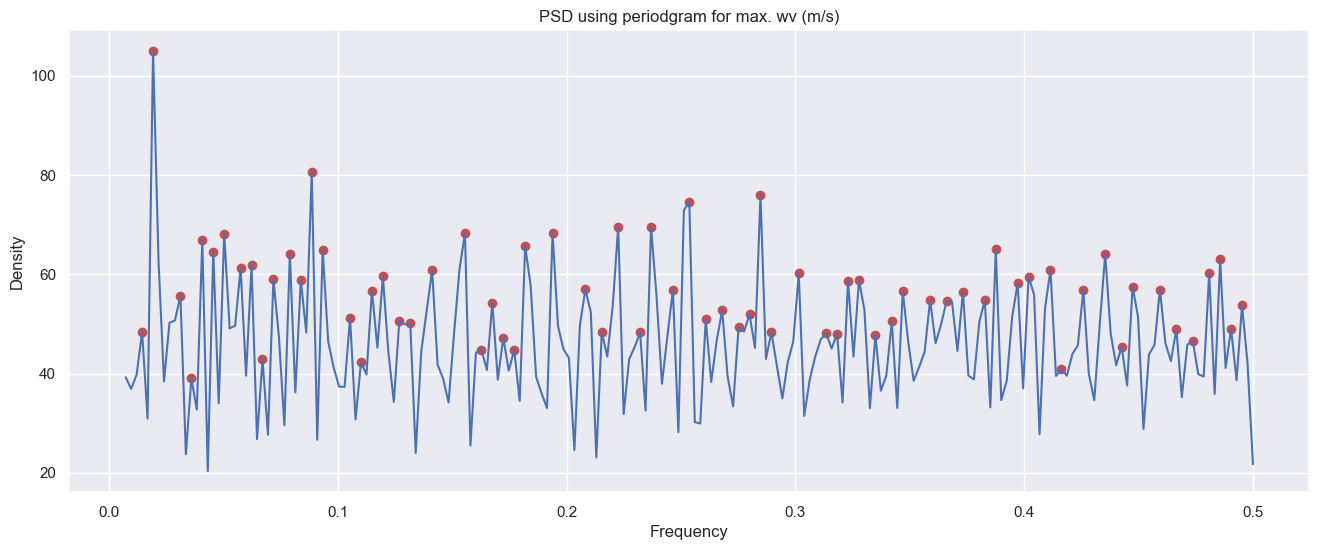

Frequency     Density     Period
0   0.019139  104.925356  52.250000
1   0.088517   80.630399  11.297297
2   0.284689   75.976929   3.512605
3   0.253589   74.584100   3.943396
4   0.222488   69.532645   4.494624

Frequency       Density      Period
0   0.019139  14960.498850   52.250000
1   0.179426  14194.300740    5.573333
2   0.007177   9940.850241  139.333333
3   0.198565   9479.278536    5.036145
4   0.332536   8680.663690    3.007194

In [24]:
#create a dizio to save the period
dizio_period = {}

for column in Weather_data_wk.columns:
    ###Retrieve the seasonlity by using the periodogram and getting the most used frequencies.
    f_per, Pxx_per = signal.periodogram(Weather_data_wk[column],1,detrend=None,window='hann',return_onesided=True,scaling='density')
    f_per = f_per[1:]
    Pxx_per = Pxx_per[1:]

    #Find the peaks of the periodogram.
    #peaks = signal.find_peaks(Pxx_per[f_per >= 0], prominence=(Pxx_per) * 0.001)[0]
    peaks = signal.find_peaks(Pxx_per[f_per >= 0])[0]
    peak_freq = f_per[peaks]
    peak_dens = Pxx_per[peaks]

    #Plot of the analysis transformation and of its peaks. Only the first five are interestings
    fig = plt.figure(figsize=(16,6))
    plt.plot(peak_freq, peak_dens, 'ro')
    plt.plot(f_per[2:],Pxx_per[2:])
    plt.xlabel('Frequency')
    plt.ylabel('Density')
    plt.title(f'PSD using periodgram for {column}')
    plt.show()

    #Retrieving of the values
    data = {'Frequency': peak_freq, 'Density': peak_dens, 'Period': 1/peak_freq}
    df = pd.DataFrame(data) #ATTENZIONE ORDINARE PER DENISTA
    df.sort_values('Density', ascending=False, inplace=True, ignore_index=True)
    display(df.head()) #come possimao vedere il più frequete è 12

    dizio_period[column] = df.loc[0,'Period']


In [25]:
dizio_period

{'p (mbar)': 41.8,
 'T (degC)': 52.25,
 'Tpot (K)': 52.25,
 'Tdew (degC)': 52.25,
 'rh (%)': 52.25,
 'VPmax (mbar)': 52.25,
 'VPact (mbar)': 52.25,
 'VPdef (mbar)': 52.25,
 'sh (g/kg)': 52.25,
 'H2OC (mmol/mol)': 52.25,
 'rho (g/m**3)': 52.25,
 'wv (m/s)': 52.25,
 'max. wv (m/s)': 52.25,
 'wd (deg)': 52.25}

#### test 2

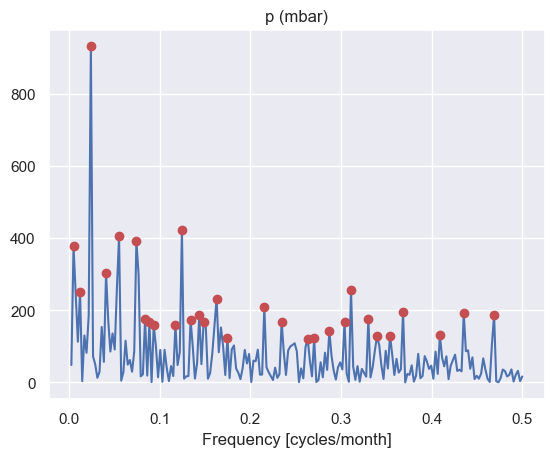

Freq      Period       Power
0   0.004785  209.000000  377.468928
1   0.011962   83.600000  251.393592
2   0.023923   41.800000  932.344182
3   0.040670   24.588235  304.302185
4   0.055024   18.173913  405.115025
5   0.074163   13.483871  391.605920
6   0.083732   11.942857  177.236102
7   0.088517   11.297297  167.160435
8   0.093301   10.717949  158.693804
9   0.117225    8.530612  160.067759
10  0.124402    8.038462  423.169523
11  0.133971    7.464286  172.994268
12  0.143541    6.966667  188.072083
13  0.148325    6.741935  166.564547
14  0.162679    6.147059  232.656554
15  0.174641    5.726027  124.124039
16  0.215311    4.644444  209.932763
17  0.234450    4.265306  168.944048
18  0.263158    3.800000  121.237741
19  0.270335    3.699115  122.459935
20  0.287081    3.483333  143.865829
21  0.303828    3.291339  168.278484
22  0.311005    3.215385  257.317140
23  0.330144    3.028986  175.284081
24  0.339713    2.943662  128.026411
25  0.354067    2.824324  129.831592
26  0.368421    2.714286  195.498227
27  0.409091    2.444444  130.794209
28  0.435407    2.296703  191.416388
29  0.468900    2.132653  187.522960

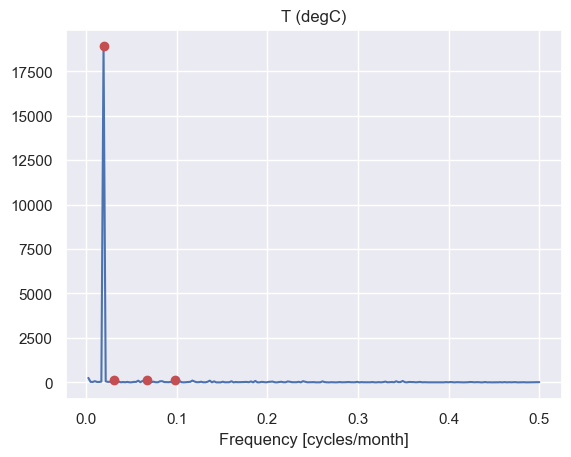

Freq     Period         Power
0  0.019139  52.250000  18899.406162
1  0.031100  32.153846    117.468199
2  0.066986  14.928571    129.502714
3  0.098086  10.195122    122.711814

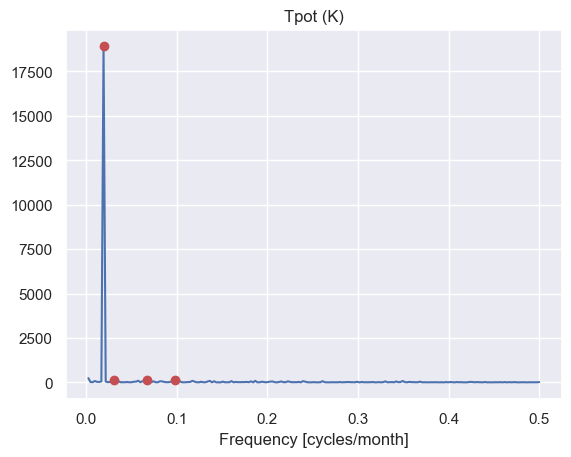

Freq     Period         Power
0  0.019139  52.250000  18911.982578
1  0.031100  32.153846    123.544884
2  0.066986  14.928571    126.517070
3  0.098086  10.195122    118.463366

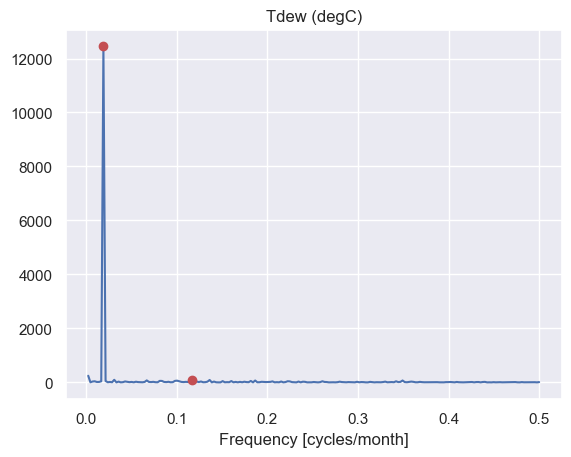

Freq     Period         Power
0  0.019139  52.250000  12449.694962
1  0.117225   8.530612    102.883104

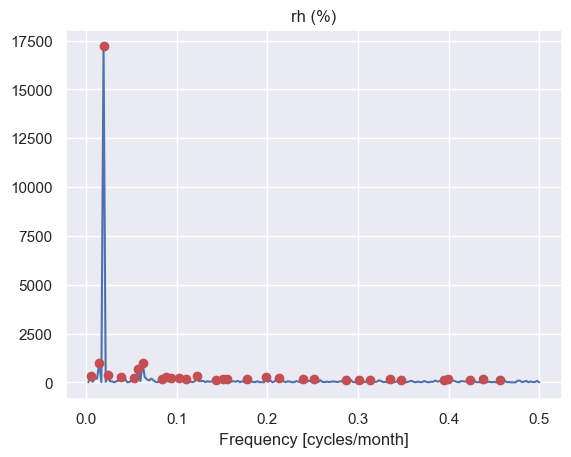

Freq      Period         Power
0   0.004785  209.000000    317.105397
1   0.014354   69.666667    987.722372
2   0.019139   52.250000  17200.621668
3   0.023923   41.800000    353.847716
4   0.038278   26.125000    297.367023
5   0.052632   19.000000    217.490541
6   0.057416   17.416667    704.023436
7   0.062201   16.076923   1007.830935
8   0.083732   11.942857    164.529839
9   0.088517   11.297297    260.450837
10  0.093301   10.717949    227.534982
11  0.102871    9.720930    233.459023
12  0.110048    9.086957    181.747900
13  0.122010    8.196078    317.368785
14  0.143541    6.966667    117.321251
15  0.150718    6.634921    192.999374
16  0.155502    6.430769    181.605895
17  0.177033    5.648649    173.910154
18  0.198565    5.036145    255.398664
19  0.212919    4.696629    203.522721
20  0.239234    4.180000    172.638443
21  0.251196    3.980952    186.225999
22  0.287081    3.483333    133.695594
23  0.301435    3.317460    118.517906
24  0.313397    3.190840    106.338500
25  0.334928    2.985714    157.185646
26  0.346890    2.882759    108.966966
27  0.394737    2.533333    139.718798
28  0.399522    2.502994    188.161634
29  0.423445    2.361582    110.458529
30  0.437799    2.284153    177.498786
31  0.456938    2.188482    121.579405

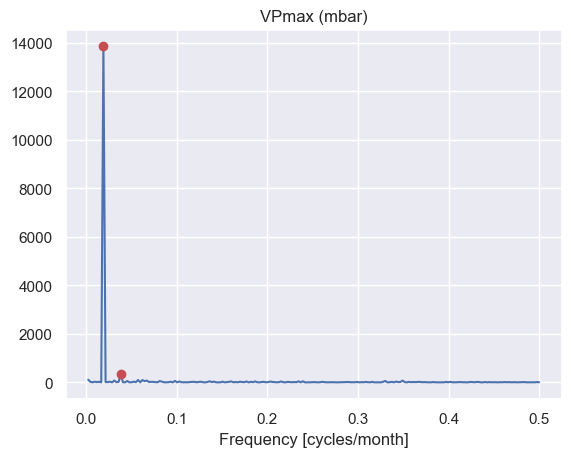

Freq  Period         Power
0  0.019139  52.250  13856.667580
1  0.038278  26.125    325.588187

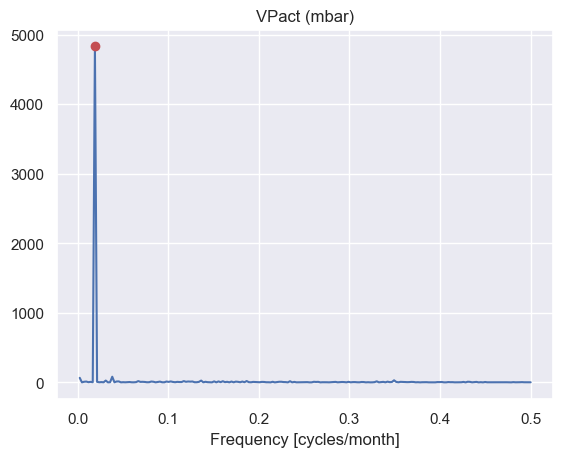

Freq  Period        Power
0  0.019139   52.25  4830.247406

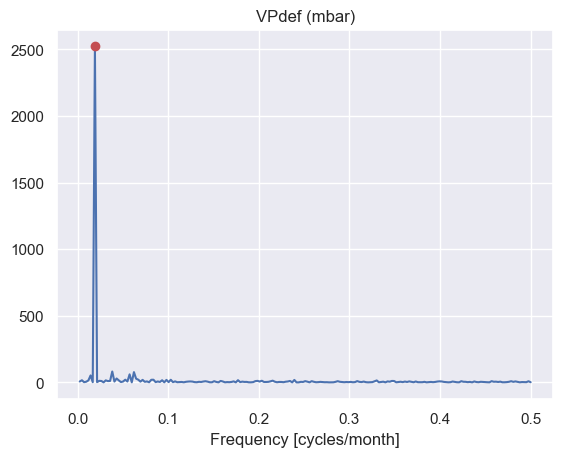

Freq  Period       Power
0  0.019139   52.25  2522.67193

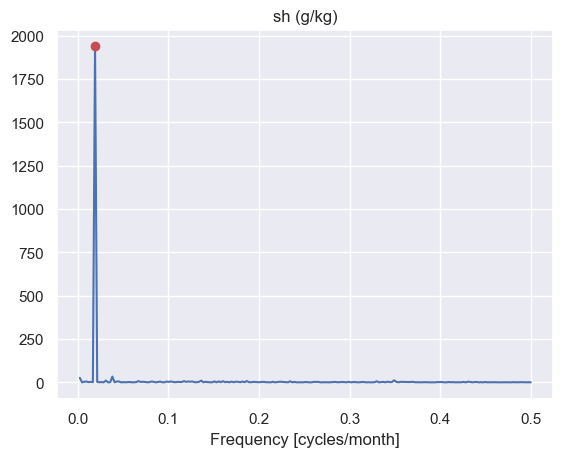

Freq  Period       Power
0  0.019139   52.25  1937.48684

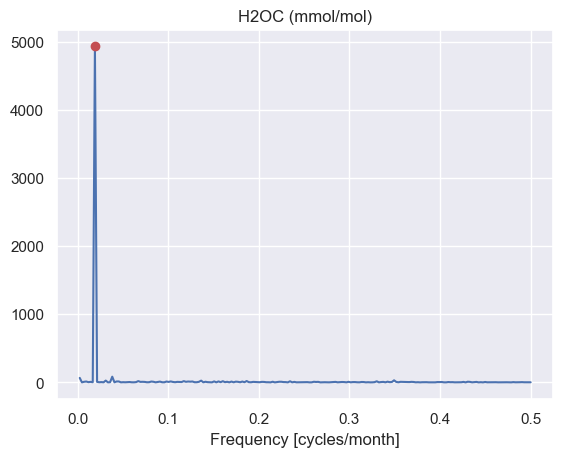

Freq  Period        Power
0  0.019139   52.25  4930.348641

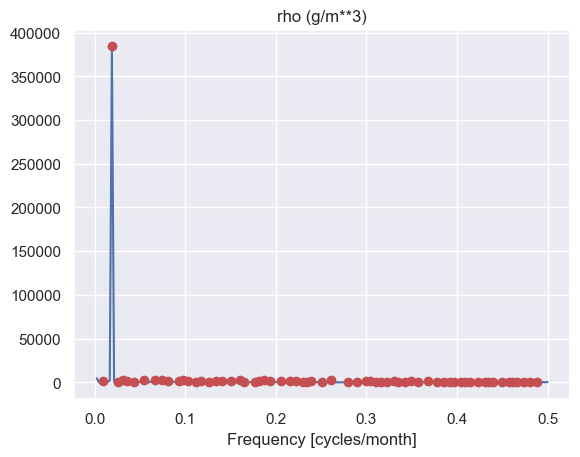

Freq      Period          Power
0   0.009569  104.500000    2100.683378
1   0.019139   52.250000  384195.013277
2   0.026316   38.000000     400.951091
3   0.031100   32.153846    3010.188443
4   0.035885   27.866667    2023.110394
..       ...         ...            ...
59  0.461722    2.165803     343.161908
60  0.466507    2.143590     476.307077
61  0.473684    2.111111     319.195940
62  0.480861    2.079602     385.086413
63  0.488038    2.049020     178.798750

[64 rows x 3 columns]

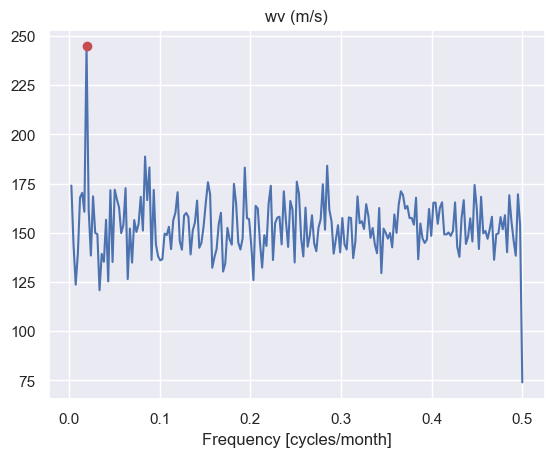

Freq  Period      Power
0  0.019139   52.25  244.63262

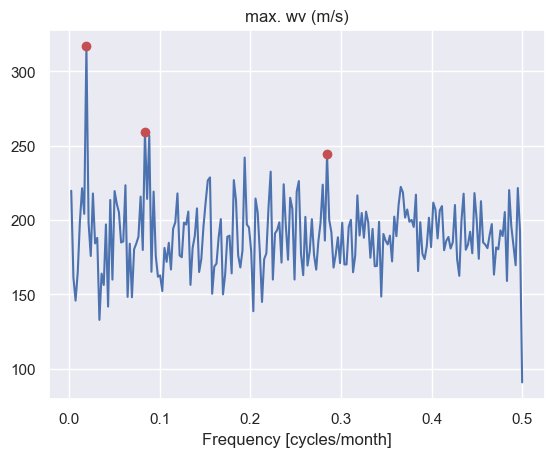

Freq     Period       Power
0  0.019139  52.250000  316.772934
1  0.083732  11.942857  259.494901
2  0.284689   3.512605  244.334489

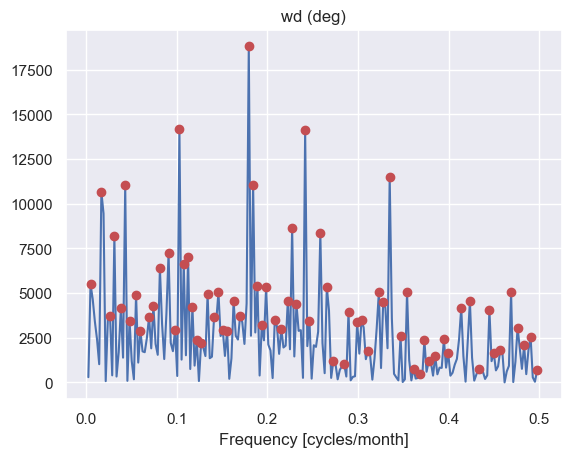

Freq      Period         Power
0   0.004785  209.000000   5502.372998
1   0.016746   59.714286  10657.633322
2   0.026316   38.000000   3705.304151
3   0.031100   32.153846   8179.053326
4   0.038278   26.125000   4144.070566
..       ...         ...           ...
65  0.468900    2.132653   5033.008598
66  0.476077    2.100503   3071.435151
67  0.483254    2.069307   2071.222059
68  0.490431    2.039024   2556.491531
69  0.497608    2.009615    676.045554

[70 rows x 3 columns]

In [26]:
for column in Weather_data_wk:
    # (Optional) Check with the frequency analysis (PSD) the frequency of the time series (train data), to conferm the seasonality value to be included in the forecasting
    Fs = 1 # our unit of measures is "months", thus 1 per month
    f_per, Pxx_per = signal.periodogram(Weather_data_wk[column],Fs,detrend=False,window='boxcar',return_onesided=True,scaling='density')
    f_per = f_per[1:]
    Pxx_per = Pxx_per[1:]
    plt.plot(f_per,Pxx_per)
    plt.xlabel('Frequency [cycles/month]')
    plt.title(column)

    peaks = signal.find_peaks(Pxx_per[f_per >=0], prominence=100)[0]
    peak_freq =  f_per[peaks]
    peak_power = Pxx_per[peaks]
    plt.plot(peak_freq, peak_power, 'ro')
    plt.show()

    data = {'Freq': peak_freq, 'Period': 1/peak_freq, 'Power': peak_power}
    df = pd.DataFrame(data)
    display(df)

# DESCRIBING THE TIME SERIES PATTERS

In [27]:
temp = Weather_data_wk_train['T (degC)']

## Stationarity

first we have to check the stationary of the time series, we do this becouse many statistical model require the series to be stationary to make effective and precise predictions. 
To check the stationary we can:
-   check mean and standard deviation (have to be constant over the time)
-   use the ACF (we can also spot presence of seasonality or trend)
-   statistical hypotesis test like ADF and KPSS

### Check mean and standard deviation (Rolling statistics)

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

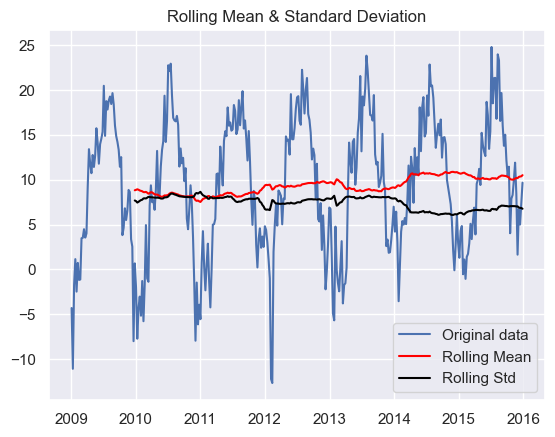

In [28]:
rolling_mean = temp.rolling(52).mean() #parameter window -> contain the lsat 52 observation (so 1 year) and calculate the mean  (CREDO)
rolling_std = temp.rolling(52).std()
plt.plot(temp, label='Original data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

Like we can see form the plot the mean start to increse during the time so it is mean that maybe the series is not stationary also we see a cycle that it repeat every year.

For the standard deviation we can see that have a constant behaviour over the years maybe a small decline (mmm forse è sbagliato, sembra che il trend a standard deviation siamo inversamente proporzionali??)

### ACF and PACF

<Figure size 640x480 with 0 Axes>

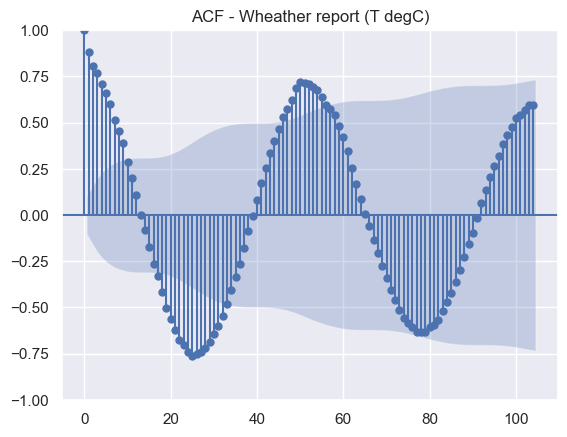

In [29]:
plt.figure()
plot_acf(temp, lags=104, title='ACF - Wheather report (T degC)')
plt.show()

we can see that the acf increase and decrease so it is means that there are a presence of a trend (start with positive values and slowly decriseas the lags increse; it is also true at the lag 25/26 from negative to positive ?? seconda osservazione penso sia sbagliata perchè in generale + lag mettiamo più si restinge in generale provare a mettere 208) and seasonality (the ACF are larger for the leasonal lags?? secondo me posso dire che semplicemente si vede una ripetizione di certi picchi che è uguale a 52) (SCRIVERE MEGLIO)

### ADF and KPSS

In [30]:
# ADF test
adf_test = adfuller(temp,autolag='AIC') 
print('ADF Statistic:', adf_test[0])
print('p-value - ADF: ', adf_test[1])
print('------------------------------')

# p > 0.05 --> We reject the null hypothesis, meaning the data is not-stationary, as expected from the plot

# KPSS test option 1
kpss_test = kpss(temp, regression='c', nlags='auto', store=True) 
print('KPSS Statistic - c:', kpss_test[0])
print('p-value - c: ', kpss_test[1])
print('------------------------------')

# p < 0.05 --> We reject the null hypothesis, meaning the data is non-stationary.
# This because the "c" option tests for stationarity around a ‘mean’ only

# KPSS test option 2
kpss_test = kpss(temp, regression='ct', nlags='auto', store=True)
print('KPSS Statistic - ct:', kpss_test[0])
print('p-value - ct: ', kpss_test[1])
print('------------------------------')

# p > 0.05 --> We can not reject the null hypothesis, meaning the data is trend stationary

ADF Statistic: -7.945514086336788
p-value - ADF:  3.2279831966229144e-12
------------------------------
KPSS Statistic - c: 0.10545784665825468
p-value - c:  0.1
------------------------------
KPSS Statistic - ct: 0.020274605447635607
p-value - ct:  0.1
------------------------------


C:\Users\elped\AppData\Local\Temp\ipykernel_2292\690312634.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(temp, regression='c', nlags='auto', store=True)
C:\Users\elped\AppData\Local\Temp\ipykernel_2292\690312634.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(temp, regression='ct', nlags='auto', store=True)


In [31]:
def kpss_test(data):
  kpss_out = kpss(data,regression='c', nlags='auto', store=True)
  print('KPSS Statistic:', kpss_out[0])
  print('p-value: ', kpss_out[1])
  if kpss_out[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> unit root, data is not stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is trend stationary')


print('KPSS on Temperature')
kpss_test(temp)


KPSS on Temperature
KPSS Statistic: 0.10545784665825468
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary


C:\Users\elped\AppData\Local\Temp\ipykernel_2292\4054022506.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_out = kpss(data,regression='c', nlags='auto', store=True)


In [32]:
# ADF on the different data from previous examples

def adfuller_test(data):
  adf_test = adfuller(data,autolag='AIC') # AIC is the default option
  print('ADF Statistic:', adf_test[0])
  print('p-value: ', adf_test[1])
  print('Critical Values:')
  for key, value in adf_test[4].items():
      print('\t%s: %.3f' % (key, value))
  if adf_test[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is non-stationary')


print('ADF on Temperature')
adfuller_test(temp)
# p > 0.05 --> We cannot reject the null hypothesis (H0), meaning data the data has a unit root and is non-stationary.
# p <= 0.05 --> We reject the null hypothesis (H0), meaning data the data has not a unit root and is stationary.

ADF on Temperature
ADF Statistic: -7.945514086336788
p-value:  3.2279831966229144e-12
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
We can reject the null hypothesis (H0) --> data is stationary


Come ???? non ce seasonality?? non ho capito qualcosa
RICONTROLLARE

see differencing and logarithm transformation

## Seasonality

## Decomposition

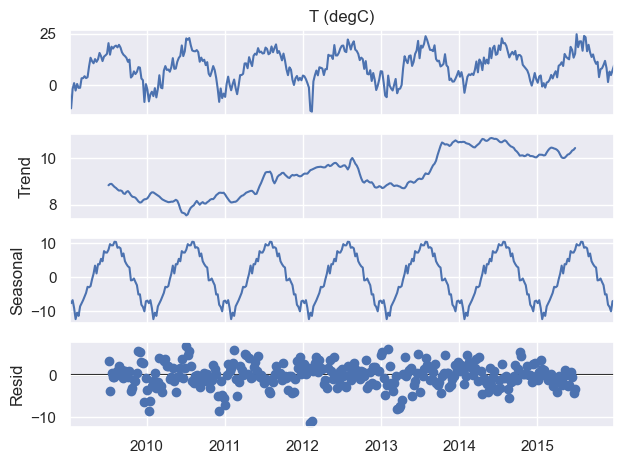

In [33]:
decompose_data_add = seasonal_decompose(Weather_data_wk_train['T (degC)'], model='additive', period = int(dizio_period['T (degC)'])) # period is automatically set to 12, considering the monthly data
decompose_data_add.plot()
plt.show()

simao sicuri che non sia una roba della frequency analysis??

# FORECASTING

In [34]:
# feature to forecast
feature = 'T (degC)'

In [35]:
#final test and train
train = Weather_data_wk_train[feature]
#display(train)
test = Weather_data_wk_test[feature]
#display(test)

In [36]:
#df to take track of the precision of the models
df_accuracy = pd.DataFrame(columns=['Model','AIC','RMSE','MAE'])
display(df_accuracy)

Empty DataFrame
Columns: [Model, AIC, RMSE, MAE]
Index: []

AUTOMATIZZARE LA SCELTA DEL PERIODO!!!

## Exponential Smoothing Additive Single

In [62]:
#apply trasformation on the train
#train = np.log(train)

#cration of the model
modelESAS = ETSModel(train, error='add').fit()
#make the prediction
pred = modelESAS.get_prediction(start=test.index[0], end=test.index[-1])
#summary of the model
df_modelESAS = pred.summary_frame()
#take the forecasting
forecasts = df_modelESAS['mean']

#df_modelESAS = np.exp(df_modelESAS) #nel caso venga fatto il log!!

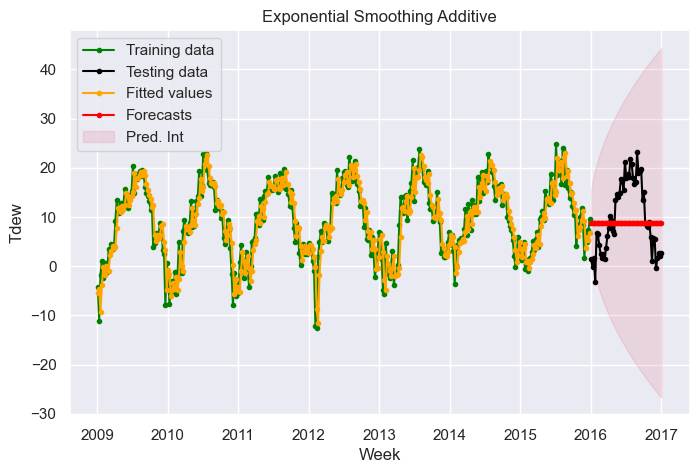

In [63]:
# Visualization
plt.figure(figsize=(8,5))
#plt.plot(np.exp(train), color='green',marker = '.',label='Training data')
plt.plot(train, color='green',marker = '.',label='Training data')
plt.plot(test, color='black', marker = '.',label='Testing data')
#plt.plot(np.exp(modelESAS.fittedvalues),color='orange', marker = '.', label='Fitted values')
plt.plot(modelESAS.fittedvalues,color='orange', marker = '.', label='Fitted values')
plt.plot(forecasts, color='red', marker = '.', label='Forecasts')
plt.fill_between(df_modelESAS.index, df_modelESAS['pi_lower'], df_modelESAS['pi_upper'], alpha=.1, color='crimson', label='Pred. Int')
plt.xlabel('Week')
plt.ylabel('Tdew')
plt.title('Exponential Smoothing Additive')
plt.legend()
plt.show()

In [64]:
#save the accuracy
df_accuracy = pd.concat([df_accuracy, pd.DataFrame({'Model':'Exponentian Smoothing Additive Single', 'AIC':modelESAS.aic, 'RMSE':root_mean_squared_error(test, df_modelESAS['mean']), 'MAE':mean_absolute_error(test, df_modelESAS['mean'])},index=[0])], ignore_index=True)

## Exponential Smoothing Additive Double

In [48]:
#apply trasformation on the train
#train = np.log(train)

#cration of the model
modelESADouble = ETSModel(train, error='add', trend = 'add', damped_trend=False).fit()
#make the prediction
pred = modelESADouble.get_prediction(start=test.index[0], end=test.index[-1])
#summary of the model
df_modelESADouble = pred.summary_frame()
#take the forecasting
forecasts = df_modelESADouble['mean']

#df_modelESADouble = np.exp(df_modelESADouble) #nel caso venga fatto il log!!

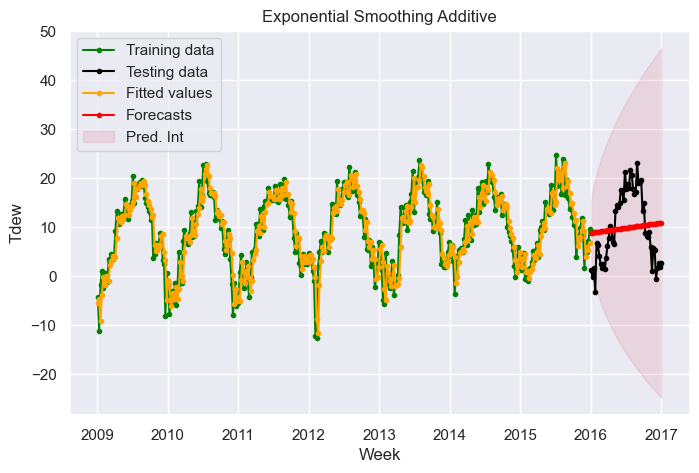

In [50]:
# Visualization
plt.figure(figsize=(8,5))
#plt.plot(np.exp(train), color='green',marker = '.',label='Training data')
plt.plot(train, color='green',marker = '.',label='Training data')
plt.plot(test, color='black', marker = '.',label='Testing data')
#plt.plot(np.exp(modelESADouble.fittedvalues),color='orange', marker = '.', label='Fitted values')
plt.plot(modelESADouble.fittedvalues,color='orange', marker = '.', label='Fitted values')
plt.plot(forecasts, color='red', marker = '.', label='Forecasts')
plt.fill_between(df_modelESADouble.index, df_modelESADouble['pi_lower'], df_modelESADouble['pi_upper'], alpha=.1, color='crimson', label='Pred. Int')
plt.xlabel('Week')
plt.ylabel('Tdew')
plt.title('Exponential Smoothing Additive')
plt.legend()
plt.show()

In [60]:
#save the accuracy
df_accuracy = pd.concat([df_accuracy, pd.DataFrame({'Model':'Exponentian Smoothing Additive Double', 'AIC':modelESADouble.aic, 'RMSE':root_mean_squared_error(test, df_modelESADouble['mean']), 'MAE':mean_absolute_error(test, df_modelESADouble['mean'])},index=[0])], ignore_index=True)

## Exponential Smoothing Additive Double Damped Trend True

In [55]:
#apply trasformation on the train
#train = np.log(train)

#cration of the model
modelESADDouble = ETSModel(train, error='add', trend = 'add', damped_trend=True).fit()
#make the prediction
pred = modelESADDouble.get_prediction(start=test.index[0], end=test.index[-1])
#summary of the model
df_modelESADDouble = pred.summary_frame()
#take the forecasting
forecasts = df_modelESADDouble['mean']

#df_modelESADDouble = np.exp(df_modelESADDouble) #nel caso venga fatto il log!!

In [56]:
# Visualization
plt.figure(figsize=(8,5))
#plt.plot(np.exp(train), color='green',marker = '.',label='Training data')
plt.plot(train, color='green',marker = '.',label='Training data')
plt.plot(test, color='black', marker = '.',label='Testing data')
#plt.plot(np.exp(modelESADDouble.fittedvalues),color='orange', marker = '.', label='Fitted values')
plt.plot(modelESADDouble.fittedvalues,color='orange', marker = '.', label='Fitted values')
plt.plot(forecasts, color='red', marker = '.', label='Forecasts')
plt.fill_between(df_modelESADDouble.index, df_modelESADDouble['pi_lower'], df_modelESADDouble['pi_upper'], alpha=.1, color='crimson', label='Pred. Int')
plt.xlabel('Week')
plt.ylabel('Tdew')
plt.title('Exponential Smoothing Additive')
plt.legend()
plt.show()

like we can see from the plot it is like the ESA Single 

In [59]:
#save the accuracy
df_accuracy = pd.concat([df_accuracy, pd.DataFrame({'Model':'Exponentian Smoothing Additive Double Damped True', 'AIC':modelESADDouble.aic, 'RMSE':root_mean_squared_error(test, df_modelESADDouble['mean']), 'MAE':mean_absolute_error(test, df_modelESADDouble['mean'])},index=[0])], ignore_index=True)

## Exponential Smoothing Additive

NOTE: Models with multiplicative errors are useful for strictly positive data, but are not numerically stable with data containing zeros or negative values like in this case.
So we will test EST(A,A,Ad) and EST(A,A,A)

In [39]:
#apply trasformation on the train
#train = np.log(train)

#cration of the model
modelESA = ETSModel(train, error='add', trend = 'add', seasonal='add', seasonal_periods=52, damped_trend=False).fit()
#make the prediction
pred = modelESA.get_prediction(start=test.index[0], end=test.index[-1])
#summary of the model
df_modelESA = pred.summary_frame()
#take the forecasting
forecasts = df_modelESA['mean']

#df_modelESA = np.exp(df_modelESA) #nel caso venga fatto il log!!

c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


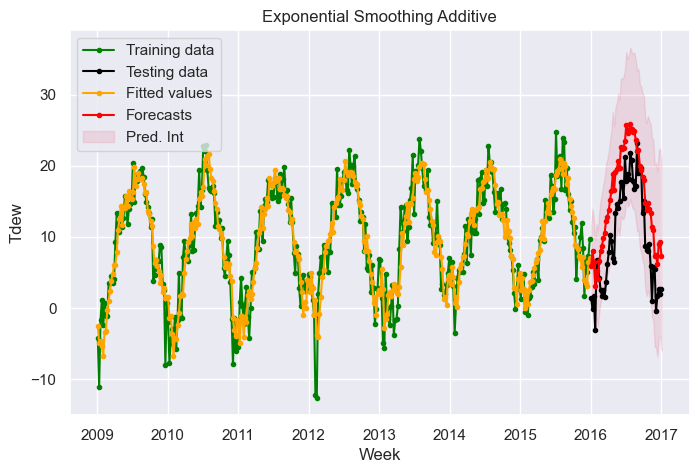

In [40]:
# Visualization
plt.figure(figsize=(8,5))
#plt.plot(np.exp(train), color='green',marker = '.',label='Training data')
plt.plot(train, color='green',marker = '.',label='Training data')
plt.plot(test, color='black', marker = '.',label='Testing data')
#plt.plot(np.exp(modelESA.fittedvalues),color='orange', marker = '.', label='Fitted values')
plt.plot(modelESA.fittedvalues,color='orange', marker = '.', label='Fitted values')
plt.plot(forecasts, color='red', marker = '.', label='Forecasts')
plt.fill_between(df_modelESA.index, df_modelESA['pi_lower'], df_modelESA['pi_upper'], alpha=.1, color='crimson', label='Pred. Int')
plt.xlabel('Week')
plt.ylabel('Tdew')
plt.title('Exponential Smoothing Additive')
plt.legend()
plt.show()

In [41]:
#save the accuracy
df_accuracy = pd.concat([df_accuracy, pd.DataFrame({'Model':'Exponentian Smoothing Additive', 'AIC':modelESA.aic, 'RMSE':root_mean_squared_error(test, df_modelESA['mean']), 'MAE':mean_absolute_error(test, df_modelESA['mean'])},index=[0])], ignore_index=True)

C:\Users\elped\AppData\Local\Temp\ipykernel_2292\1261871250.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_accuracy = pd.concat([df_accuracy, pd.DataFrame({'Model':'Exponentian Smoothing Additive', 'AIC':modelESA.aic, 'RMSE':root_mean_squared_error(test, df_modelESA['mean']), 'MAE':mean_absolute_error(test, df_modelESA['mean'])},index=[0])], ignore_index=True)


## Exponential Smoothing Addictive Damped Trend True

In [42]:
#apply trasformation on the train
#train = np.log(train)

#cration of the model
modelESAd = ETSModel(train, error='add', trend = 'add', seasonal='add', seasonal_periods=52, damped_trend=True).fit()
#make the prediction
pred = modelESAd.get_prediction(start=test.index[0], end=test.index[-1])
#summary of the model
df_modelESAd = pred.summary_frame()
#take the forecasting
forecasts = df_modelESAd['mean']

#df_modelESAd = np.exp(df_modelESAd) #nel caso venga fatto il log!!


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


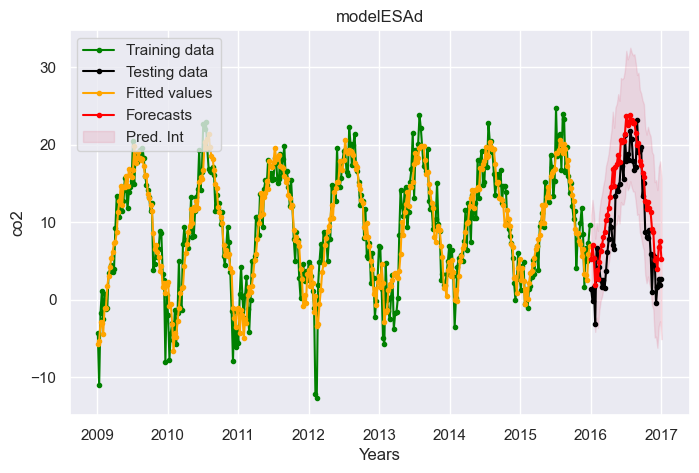

In [43]:
# Visualization #PER IL PLTO RI TRASFORMARE I DATI CON L'ESPONENZIALE!!!!!
plt.figure(figsize=(8,5))
plt.plot((train), color='green',marker = '.',label='Training data')
plt.plot(test, color='black', marker = '.',label='Testing data')
plt.plot((modelESAd.fittedvalues),color='orange', marker = '.', label='Fitted values')
plt.plot(forecasts, color='red', marker = '.', label='Forecasts')
plt.fill_between(df_modelESAd.index, df_modelESAd['pi_lower'], df_modelESAd['pi_upper'], alpha=.1, color='crimson', label='Pred. Int')
plt.xlabel('Years')
plt.ylabel('co2')
plt.title('modelESAd')
plt.legend()
plt.show()

In [44]:
#save the accuracy
df_accuracy = pd.concat([df_accuracy, pd.DataFrame({'Model':'Exponentian Smoothing AD', 'AIC':modelESAd.aic, 'RMSE':root_mean_squared_error(test, df_modelESAd['mean']), 'MAE':mean_absolute_error(test, df_modelESAd['mean'])},index=[0])], ignore_index=True)

##  Dispaly accuracy

In [61]:
df_accuracy

Model          AIC      RMSE  \
0                     Exponentian Smoothing Additive  1932.582440  6.123421   
1                           Exponentian Smoothing AD  1924.839365  4.519451   
2              Exponentian Smoothing Additive Single  1945.438950  7.263913   
3              Exponentian Smoothing Additive Single  1949.383951  7.100954   
4              Exponentian Smoothing Additive Single  1948.273850  7.279968   
5  Exponentian Smoothing Additive Double DAmped True  1948.273850  7.279968   
6              Exponentian Smoothing Additive Double  1949.383951  7.100954   

        MAE  
0  5.627138  
1  4.055855  
2  6.306063  
3  6.359960  
4  6.287037  
5  6.287037  
6  6.359960